# MUON BEAM DUMP -- All Models


This notebook is to specifically make plots for our models of interest for our paper, `XXXX.XXXX`. For the generic muon beam dump code, see `muon_beam_dump.ipynb`. 

In [1]:
import numpy as np
from event_yields import calculate_event_yields


Parameters

Global Parameters

In [2]:
from config import build_cross_section_config
from config import build_full_config

# Stuff
force_rerun = True # Usually keep True, can turn False if only making cosmetic changes
E_0s = [10, 63, 1500, 5000]
targets = ["Water", "Lead"]

target_lengths_water = {10: 4, 63: 10, 1500: 10, 5000: 10}
target_lengths_lead = {10: 0.5, 63: 2, 1500: 5, 5000: 5}

l_T = {"Water" : target_lengths_water, "Lead" :  target_lengths_lead}
Zs = {"Water" : 10, "Lead" : 82}
As = {"Water" : 18.02, "Lead" : 207.2}
rhos = {"Water" : 1.0, "Lead" : 11.35}

# Beam Parameters
m_lepton = 0.105    # Colliding lepton mass [GeV] # DO NOT CHANGE
N_mu = 1e20         # Total number of muons on target

# Dump Parameters
theta_max = 1e-2                # Maximum allowed emission angle [rad] # DO NOT CHANGE
shield_length = 10          # Length of shield [m]
detector_length = 100       # Length of detector [m]

# Constants
alpha = 1/137
electron_charge = np.sqrt(4 * np.pi * alpha)



# Calculation parameters
xbins = 1000                    
m_Xs = np.logspace(-3, 3, 25)       # Range of X masses to compute for interpolation





# Generic Plot Code

Generalized function to build contour plots

In [3]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import os




# function to load the event counts dictionary from the default directory
def load_events_dict(config):

    experiment_name_string_ = f"experiments/{config['Target Name']}/experiment_{config['Model String']}_e{config['E_0']}_t{config['Target Length']}_s{config['Shield Length']}_d{config['Detector Length']}"
    return np.load(f"{experiment_name_string_}/event_counts.npy", allow_pickle=True)[()]



# Function to generate exclusion contour plot
def exclusion_plot(config, case, model_name,  levels, cmap, labels, show = True, scale_factor = 1, nan_value = -30, epsilon_vs_g = True, font_size = 20, font_family = "serif", font_set = "cm"):

    use_boring_colors =  False

    # Load config
    model_name_string=config["Model String"]
    plot_mrange = config["m_range"]
    plot_erange = config["e_range"]
    target_name = config["Target Name"]
    target_length = config["Target Length"]
    shield_length = config["Shield Length"]
    detector_length = config["Detector Length"]
    E = config["E_0"]

    m_X_linspace = np.logspace(plot_mrange[0], plot_mrange[1], 100)
    epsilon_linspace = np.logspace(plot_erange[0], plot_erange[1], 100) * scale_factor
    if not epsilon_vs_g:
        epsilon_linspace = epsilon_linspace * electron_charge
    Mlin, Elin = np.meshgrid(m_X_linspace, epsilon_linspace)



    fig, ax = plt.subplots(constrained_layout=True, figsize=(8, 8))

    plt.xscale("log")
    plt.yscale("log")

    # Font Shenanigans
    mpl.rcParams['font.family']=font_family
    mpl.rcParams['mathtext.fontset']=font_set
    plt.rcParams.update({'font.size': font_size})

    # Load events
    events = load_events_dict(config)[case] 
    white_events = np.log10(events)
    white_events[white_events  < -3 ] = np.NaN
    white_events = np.nan_to_num(white_events, nan = nan_value)



    # Make Contours
    if use_boring_colors:
        plt.contourf(Mlin, Elin, white_events, levels = levels, cmap =  cmap, alpha = 0.75, extend = "max")
        contours = plt.contour(Mlin, Elin, white_events, levels = levels, cmap = cmap, lw = 3)
    else:
        cm = mpl.cm.get_cmap(cmap)
        colors = [cm(0.25), cm(0.5), cm(0.75)]
        print(colors)
        plt.contourf(Mlin, Elin, white_events, levels = levels, colors = colors, alpha = 0.75, extend = "max")
        contours = plt.contour(Mlin, Elin, white_events, levels = levels, colors = colors, lw = 3)
    
    fmt = {}
    for l, label in zip(contours.levels, labels):
        fmt[l] = label
    # clabels = plt.clabel(contours, inline=True, levels=levels, fmt = fmt, colors = "black", rightside_up = True)
    # for label in clabels:
    #     label.set_va("bottom")
    



    plt.xlabel("$m_X$ [GeV]", fontsize = 24)
    plt.ylabel("$\epsilon_X$", fontsize = 24)
    if not epsilon_vs_g:
        plt.ylabel("$g$", fontsize = 24)


    plt.text(0.05, 0.99 - 0.05*1, r"Muon Beam Dump", fontsize = 20, transform = plt.gca().transAxes)
    plt.text(0.05, 0.99 - 0.05*3, r"$E_0 = %d$ GeV" % E, fontsize = 20, transform = plt.gca().transAxes)
    plt.text(0.05, 0.99 - 0.05*2, f"{target_name} Target", fontsize = 20, transform = plt.gca().transAxes)
    
    plt.text(0.95, 0.99 - 0.05*1, r"$L_{tar} = %.1f$ m" % target_length, fontsize = 20, transform = plt.gca().transAxes, ha = 'right')
    plt.text(0.95, 0.99 - 0.05*2, r"$L_{sh} = %.1f$ m" % shield_length, fontsize = 20, transform = plt.gca().transAxes, ha = 'right')
    plt.text(0.95, 0.99 - 0.05*3, r"$L_{dec} = %.1f$ m" % detector_length, fontsize = 20, transform = plt.gca().transAxes, ha = 'right')
    plt.text(0.95, 0.99 - 0.05*4, r"$\theta_{max} = 10^{-2}$", fontsize = 20, transform = plt.gca().transAxes, ha = 'right')

    plt.text(0.99, 0.01, model_name, fontsize = 24, transform = plt.gca().transAxes, ha = "right", va = "bottom")

    # plt.savefig(f"tex/Figures/exclusions_{case}_{E_0}.pdf", transparent = False)


    plt.savefig(f"{config['Experiment Directory']}/exclusions_{case}.pdf", transparent = False)
    os.makedirs(f"tex/Figures/Exclusions/{model_name_string}/{config['Target Name']}/", exist_ok=True)
    plt.savefig(f"tex/Figures/Exclusions/{model_name_string}/{config['Target Name']}/exclusions_{case}_e{E}.pdf", transparent = False)
    if show:
        plt.show()

# Muonphilic

Checking for existing event yield data at experiments/Water/experiment_muonphilic_e10_t4_s10_d100/event_counts.npy ...
Found existing event yield data for the specified experiment, no need to recalculate!
Event yields for Water with target, shield, detector lengths of 4m, 10m, 100m, at 10 GeV are available!

[(0.9882352941176471, 0.732072279892349, 0.6299269511726259, 1.0), (0.9835755478662053, 0.4127950788158401, 0.28835063437139563, 1.0), (0.7925720876585928, 0.09328719723183392, 0.11298731257208766, 1.0)]


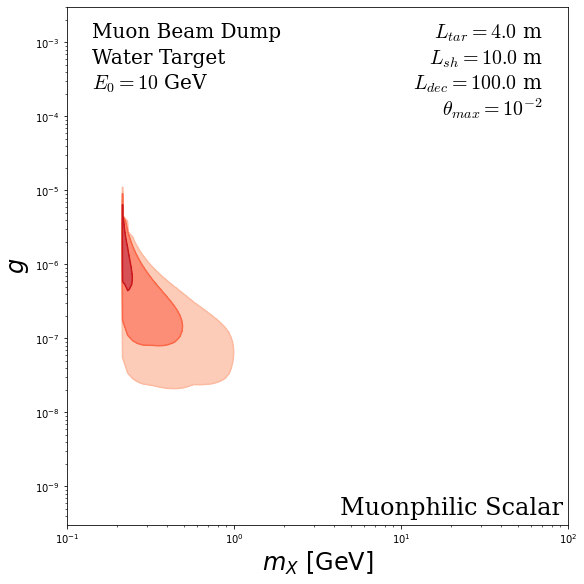

[(0.996078431372549, 0.8892425990003844, 0.5665974625144176, 1.0), (0.9949711649365629, 0.5974778931180315, 0.15949250288350636, 1.0), (0.7952941176470588, 0.2958246828143022, 0.008027681660899655, 1.0)]


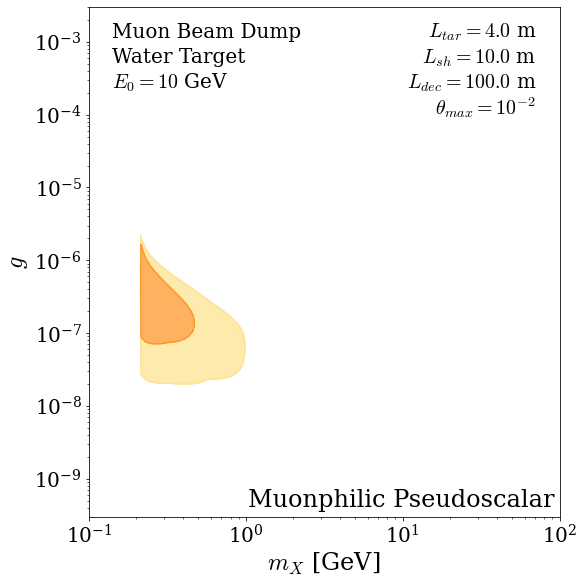

[(0.7752402921953095, 0.8583006535947711, 0.9368242983467897, 1.0), (0.41708573625528644, 0.6806305267204922, 0.8382314494425221, 1.0), (0.1271049596309112, 0.4401845444059977, 0.7074971164936563, 1.0)]


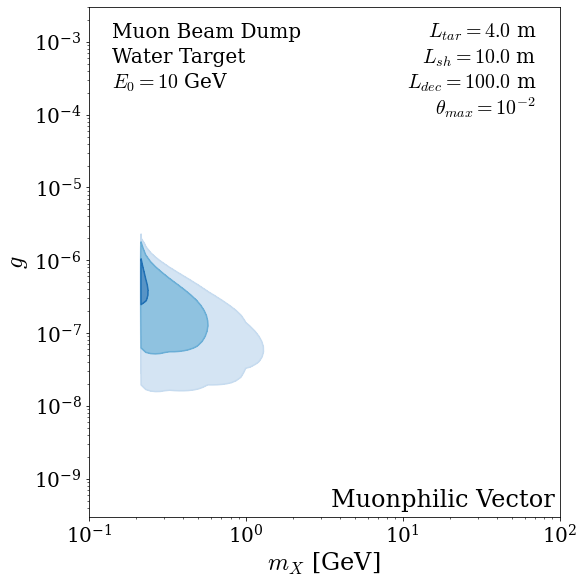

[(0.7792233756247597, 0.9132333717800846, 0.7518031526336024, 1.0), (0.45176470588235296, 0.7670895809304115, 0.4612072279892349, 1.0), (0.1340253748558247, 0.5423298731257208, 0.26828143021914647, 1.0)]


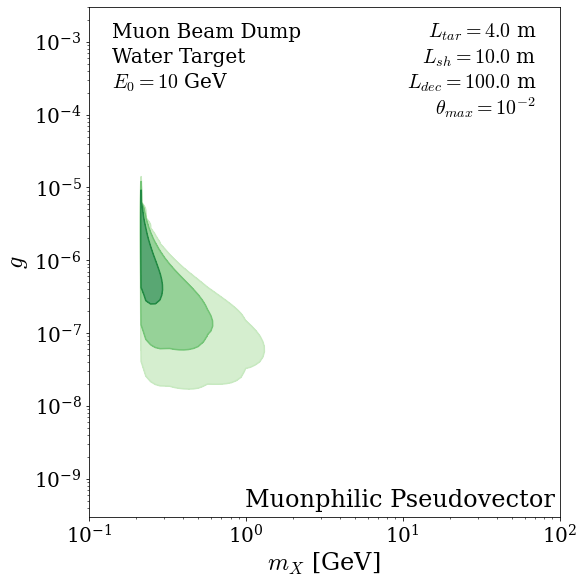

Checking for existing event yield data at experiments/Water/experiment_muonphilic_e63_t10_s10_d100/event_counts.npy ...
Found existing event yield data for the specified experiment, no need to recalculate!
Event yields for Water with target, shield, detector lengths of 10m, 10m, 100m, at 63 GeV are available!

[(0.9882352941176471, 0.732072279892349, 0.6299269511726259, 1.0), (0.9835755478662053, 0.4127950788158401, 0.28835063437139563, 1.0), (0.7925720876585928, 0.09328719723183392, 0.11298731257208766, 1.0)]


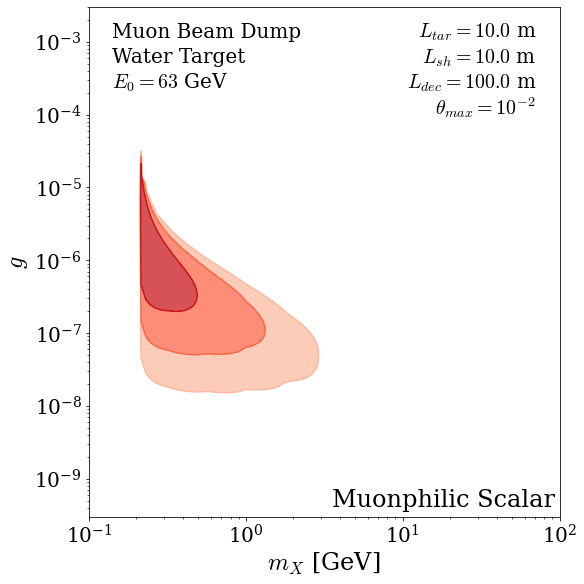

[(0.996078431372549, 0.8892425990003844, 0.5665974625144176, 1.0), (0.9949711649365629, 0.5974778931180315, 0.15949250288350636, 1.0), (0.7952941176470588, 0.2958246828143022, 0.008027681660899655, 1.0)]


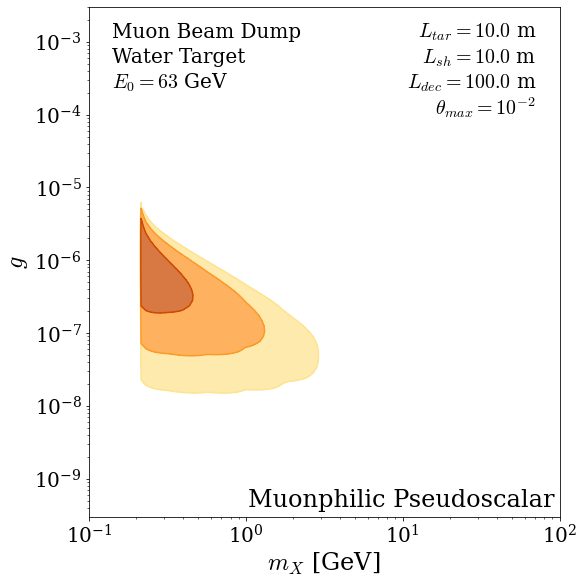

[(0.7752402921953095, 0.8583006535947711, 0.9368242983467897, 1.0), (0.41708573625528644, 0.6806305267204922, 0.8382314494425221, 1.0), (0.1271049596309112, 0.4401845444059977, 0.7074971164936563, 1.0)]


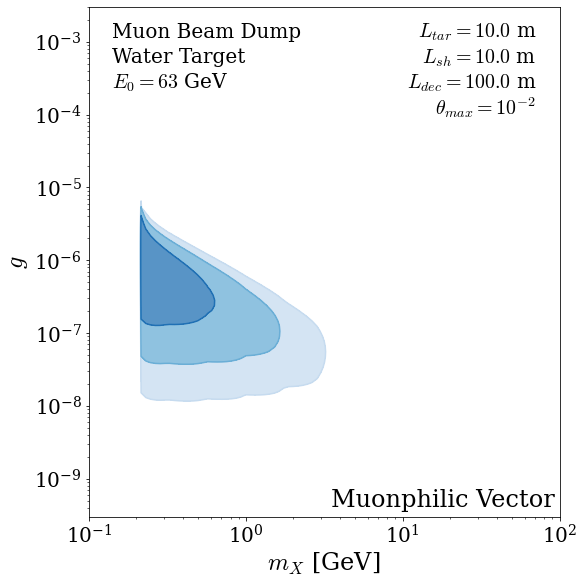

[(0.7792233756247597, 0.9132333717800846, 0.7518031526336024, 1.0), (0.45176470588235296, 0.7670895809304115, 0.4612072279892349, 1.0), (0.1340253748558247, 0.5423298731257208, 0.26828143021914647, 1.0)]


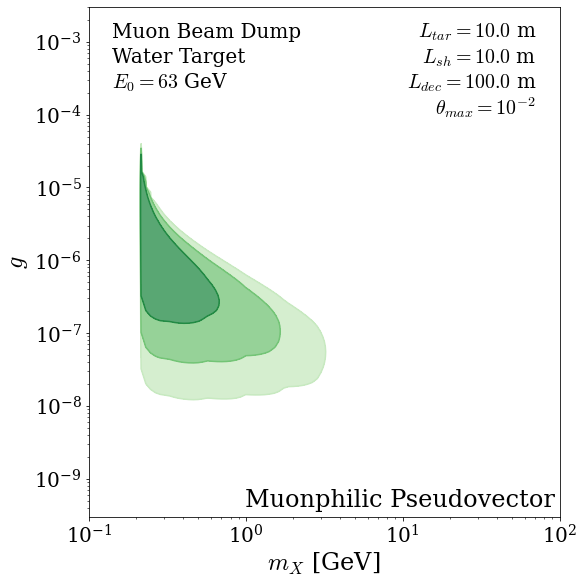

Checking for existing event yield data at experiments/Water/experiment_muonphilic_e1500_t10_s10_d100/event_counts.npy ...
Found existing event yield data for the specified experiment, no need to recalculate!
Event yields for Water with target, shield, detector lengths of 10m, 10m, 100m, at 1500 GeV are available!

[(0.9882352941176471, 0.732072279892349, 0.6299269511726259, 1.0), (0.9835755478662053, 0.4127950788158401, 0.28835063437139563, 1.0), (0.7925720876585928, 0.09328719723183392, 0.11298731257208766, 1.0)]


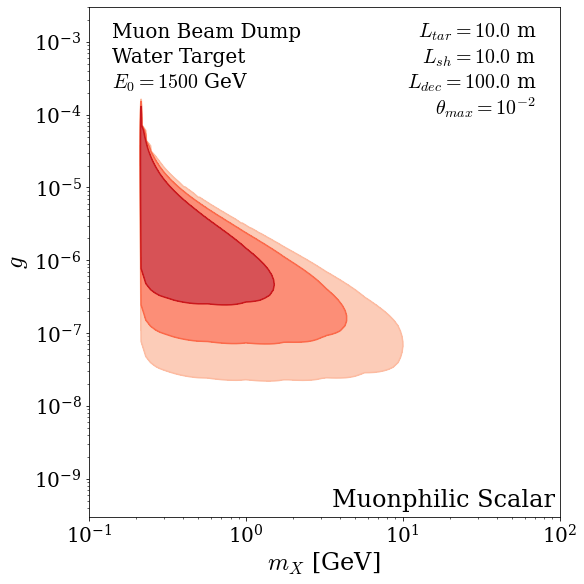

[(0.996078431372549, 0.8892425990003844, 0.5665974625144176, 1.0), (0.9949711649365629, 0.5974778931180315, 0.15949250288350636, 1.0), (0.7952941176470588, 0.2958246828143022, 0.008027681660899655, 1.0)]


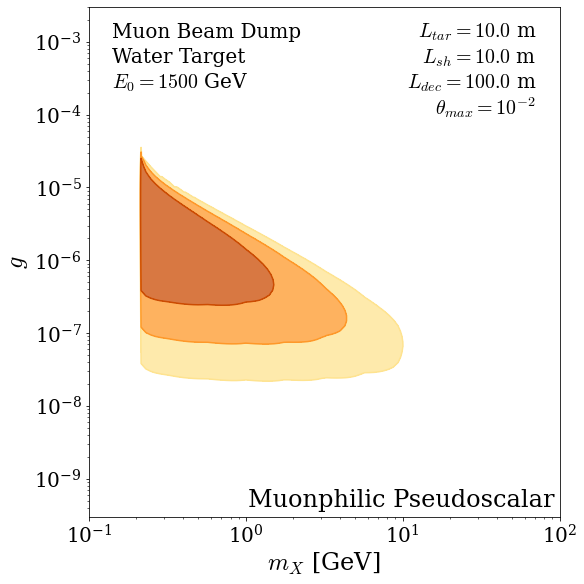

[(0.7752402921953095, 0.8583006535947711, 0.9368242983467897, 1.0), (0.41708573625528644, 0.6806305267204922, 0.8382314494425221, 1.0), (0.1271049596309112, 0.4401845444059977, 0.7074971164936563, 1.0)]


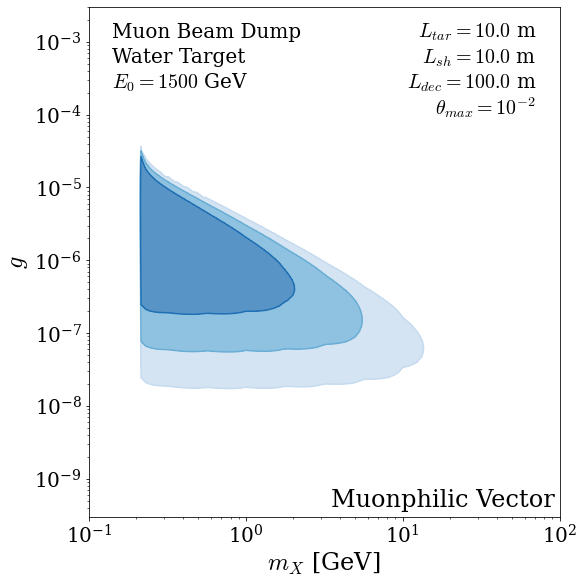

[(0.7792233756247597, 0.9132333717800846, 0.7518031526336024, 1.0), (0.45176470588235296, 0.7670895809304115, 0.4612072279892349, 1.0), (0.1340253748558247, 0.5423298731257208, 0.26828143021914647, 1.0)]


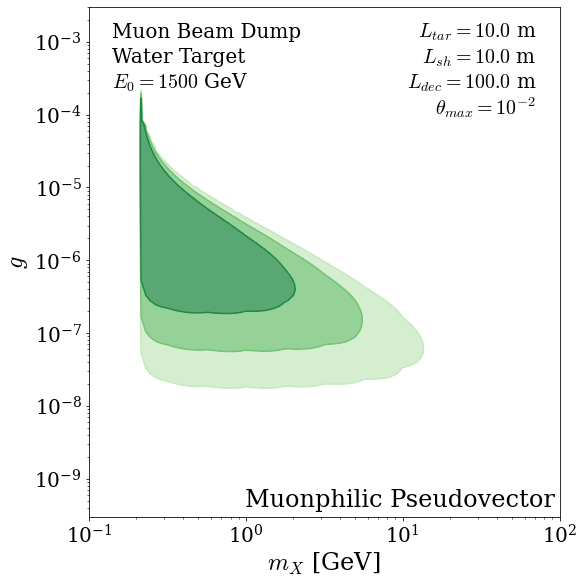

Checking for existing event yield data at experiments/Water/experiment_muonphilic_e5000_t10_s10_d100/event_counts.npy ...
Found existing event yield data for the specified experiment, no need to recalculate!
Event yields for Water with target, shield, detector lengths of 10m, 10m, 100m, at 5000 GeV are available!

[(0.9882352941176471, 0.732072279892349, 0.6299269511726259, 1.0), (0.9835755478662053, 0.4127950788158401, 0.28835063437139563, 1.0), (0.7925720876585928, 0.09328719723183392, 0.11298731257208766, 1.0)]


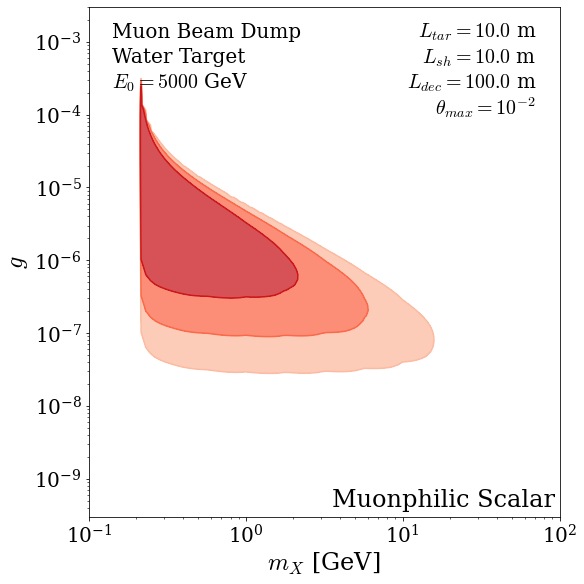

[(0.996078431372549, 0.8892425990003844, 0.5665974625144176, 1.0), (0.9949711649365629, 0.5974778931180315, 0.15949250288350636, 1.0), (0.7952941176470588, 0.2958246828143022, 0.008027681660899655, 1.0)]


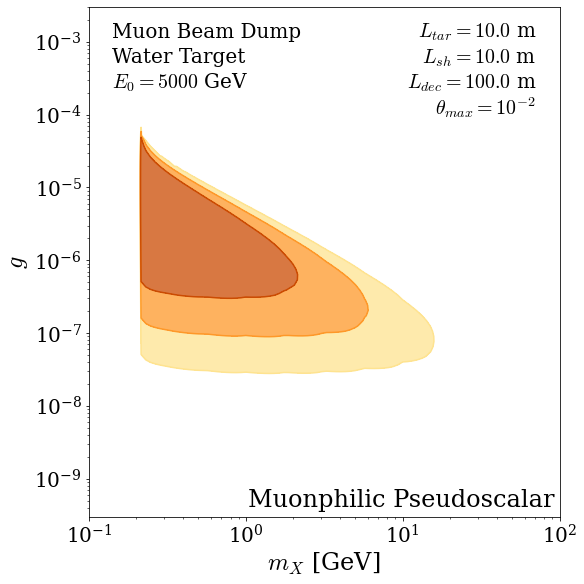

[(0.7752402921953095, 0.8583006535947711, 0.9368242983467897, 1.0), (0.41708573625528644, 0.6806305267204922, 0.8382314494425221, 1.0), (0.1271049596309112, 0.4401845444059977, 0.7074971164936563, 1.0)]


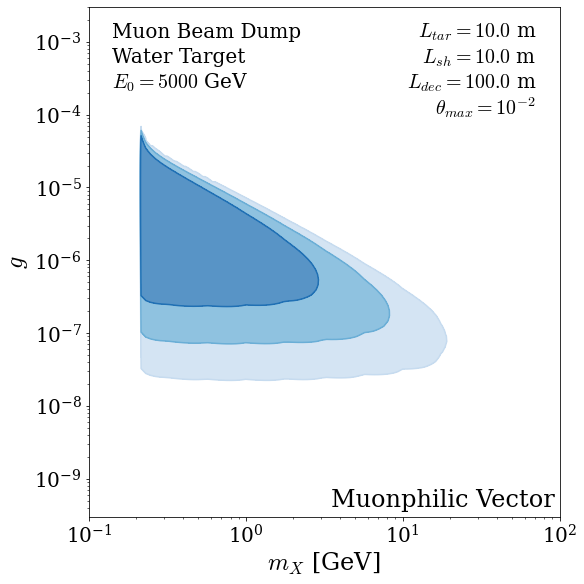

[(0.7792233756247597, 0.9132333717800846, 0.7518031526336024, 1.0), (0.45176470588235296, 0.7670895809304115, 0.4612072279892349, 1.0), (0.1340253748558247, 0.5423298731257208, 0.26828143021914647, 1.0)]


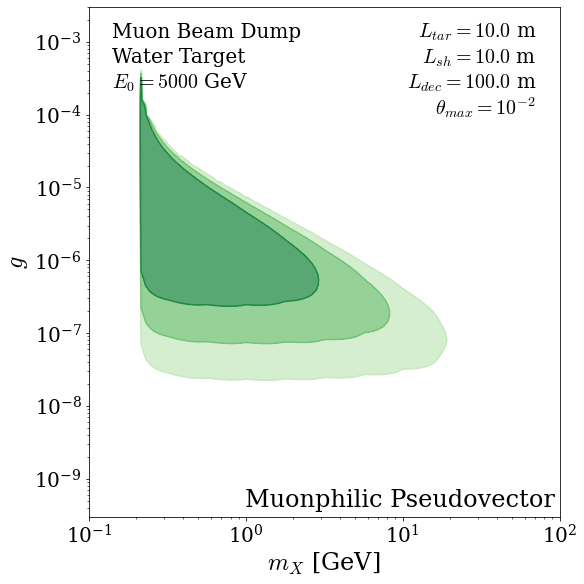

Checking for existing event yield data at experiments/Lead/experiment_muonphilic_e10_t0.5_s10_d100/event_counts.npy ...
Found existing event yield data for the specified experiment, no need to recalculate!
Event yields for Lead with target, shield, detector lengths of 0m, 10m, 100m, at 10 GeV are available!

[(0.9882352941176471, 0.732072279892349, 0.6299269511726259, 1.0), (0.9835755478662053, 0.4127950788158401, 0.28835063437139563, 1.0), (0.7925720876585928, 0.09328719723183392, 0.11298731257208766, 1.0)]


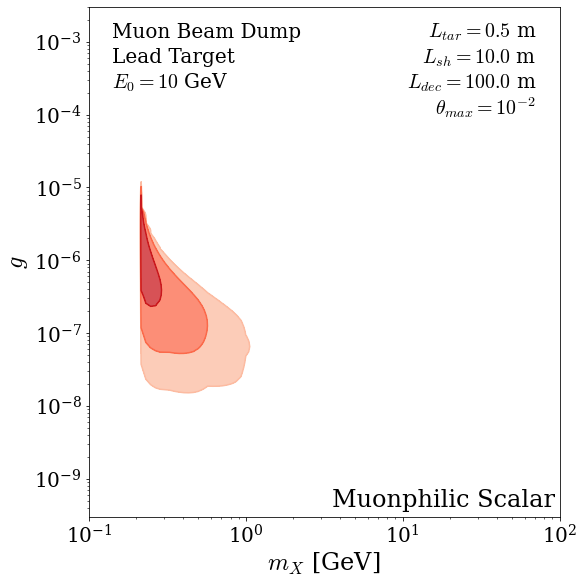

[(0.996078431372549, 0.8892425990003844, 0.5665974625144176, 1.0), (0.9949711649365629, 0.5974778931180315, 0.15949250288350636, 1.0), (0.7952941176470588, 0.2958246828143022, 0.008027681660899655, 1.0)]


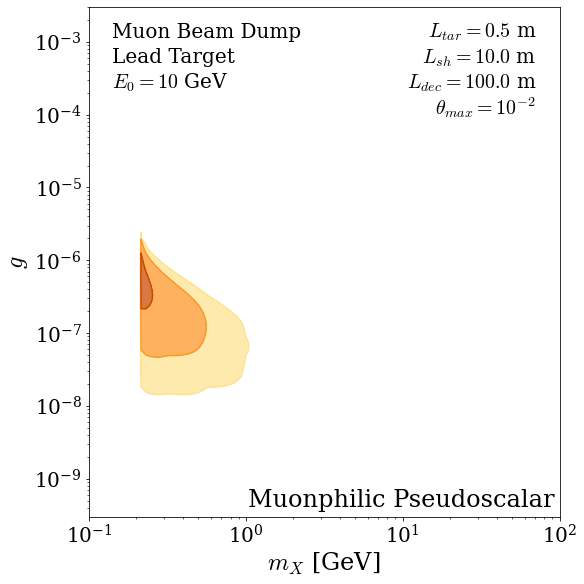

[(0.7752402921953095, 0.8583006535947711, 0.9368242983467897, 1.0), (0.41708573625528644, 0.6806305267204922, 0.8382314494425221, 1.0), (0.1271049596309112, 0.4401845444059977, 0.7074971164936563, 1.0)]


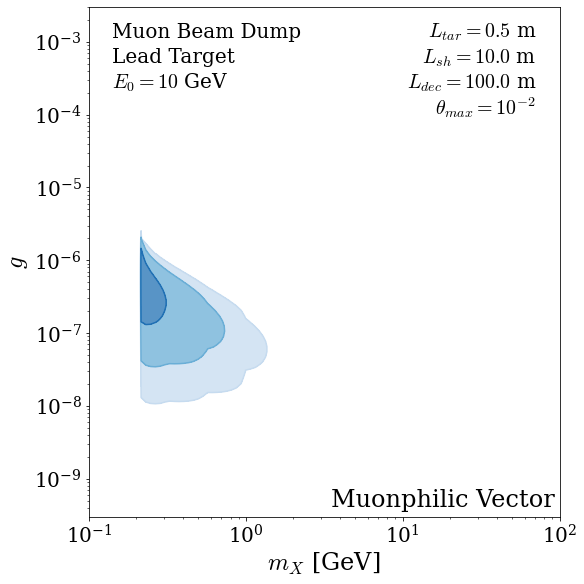

[(0.7792233756247597, 0.9132333717800846, 0.7518031526336024, 1.0), (0.45176470588235296, 0.7670895809304115, 0.4612072279892349, 1.0), (0.1340253748558247, 0.5423298731257208, 0.26828143021914647, 1.0)]


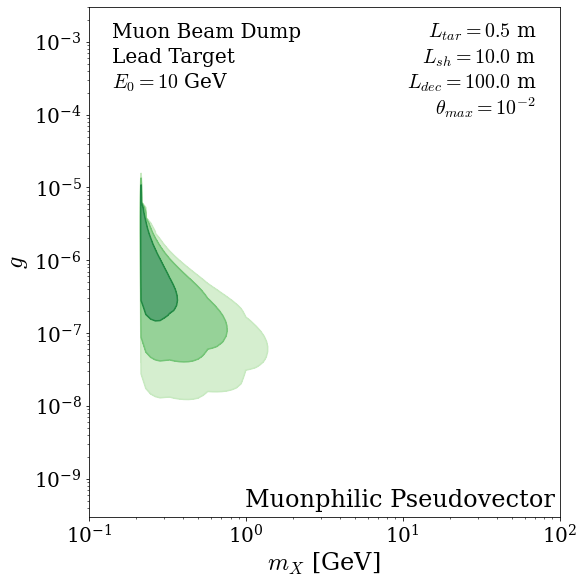

Checking for existing event yield data at experiments/Lead/experiment_muonphilic_e63_t2_s10_d100/event_counts.npy ...
Found existing event yield data for the specified experiment, no need to recalculate!
Event yields for Lead with target, shield, detector lengths of 2m, 10m, 100m, at 63 GeV are available!

[(0.9882352941176471, 0.732072279892349, 0.6299269511726259, 1.0), (0.9835755478662053, 0.4127950788158401, 0.28835063437139563, 1.0), (0.7925720876585928, 0.09328719723183392, 0.11298731257208766, 1.0)]


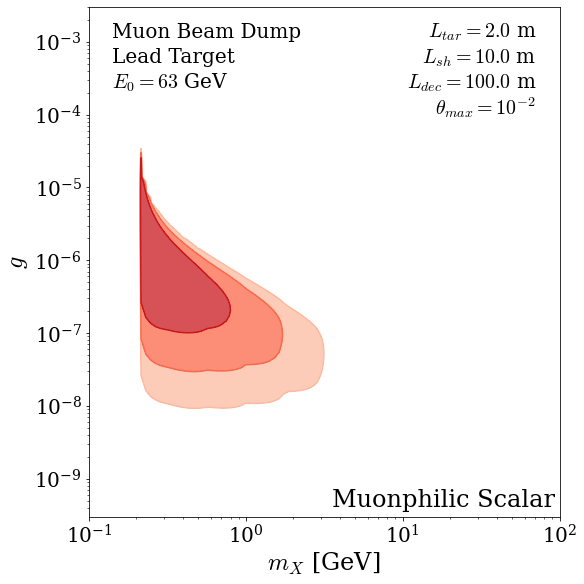

[(0.996078431372549, 0.8892425990003844, 0.5665974625144176, 1.0), (0.9949711649365629, 0.5974778931180315, 0.15949250288350636, 1.0), (0.7952941176470588, 0.2958246828143022, 0.008027681660899655, 1.0)]


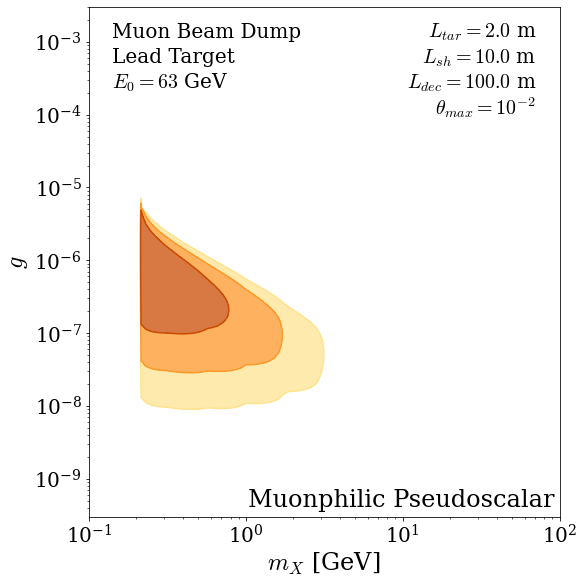

[(0.7752402921953095, 0.8583006535947711, 0.9368242983467897, 1.0), (0.41708573625528644, 0.6806305267204922, 0.8382314494425221, 1.0), (0.1271049596309112, 0.4401845444059977, 0.7074971164936563, 1.0)]


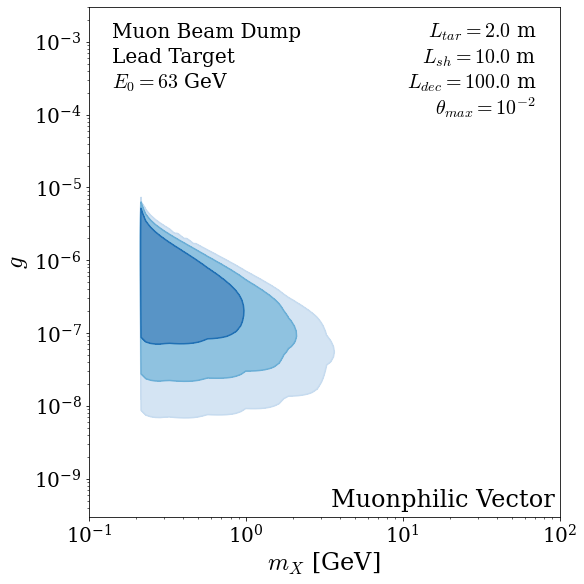

[(0.7792233756247597, 0.9132333717800846, 0.7518031526336024, 1.0), (0.45176470588235296, 0.7670895809304115, 0.4612072279892349, 1.0), (0.1340253748558247, 0.5423298731257208, 0.26828143021914647, 1.0)]


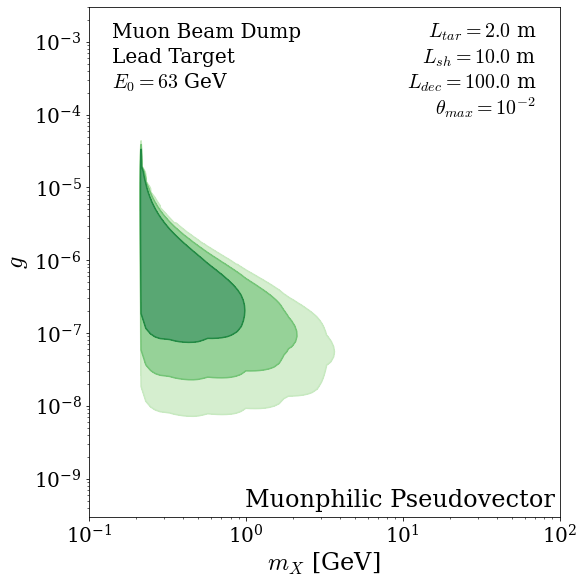

Checking for existing event yield data at experiments/Lead/experiment_muonphilic_e1500_t5_s10_d100/event_counts.npy ...
Found existing event yield data for the specified experiment, no need to recalculate!
Event yields for Lead with target, shield, detector lengths of 5m, 10m, 100m, at 1500 GeV are available!

[(0.9882352941176471, 0.732072279892349, 0.6299269511726259, 1.0), (0.9835755478662053, 0.4127950788158401, 0.28835063437139563, 1.0), (0.7925720876585928, 0.09328719723183392, 0.11298731257208766, 1.0)]


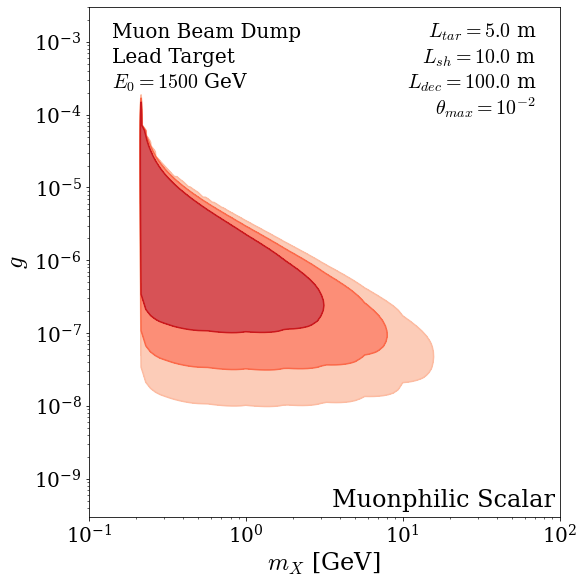

[(0.996078431372549, 0.8892425990003844, 0.5665974625144176, 1.0), (0.9949711649365629, 0.5974778931180315, 0.15949250288350636, 1.0), (0.7952941176470588, 0.2958246828143022, 0.008027681660899655, 1.0)]


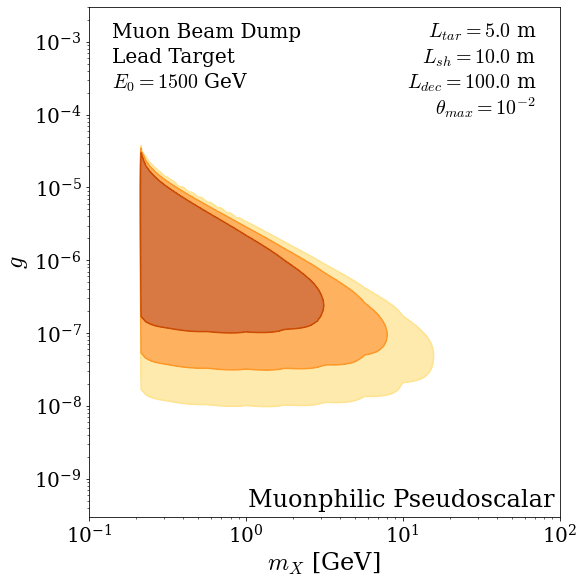

[(0.7752402921953095, 0.8583006535947711, 0.9368242983467897, 1.0), (0.41708573625528644, 0.6806305267204922, 0.8382314494425221, 1.0), (0.1271049596309112, 0.4401845444059977, 0.7074971164936563, 1.0)]


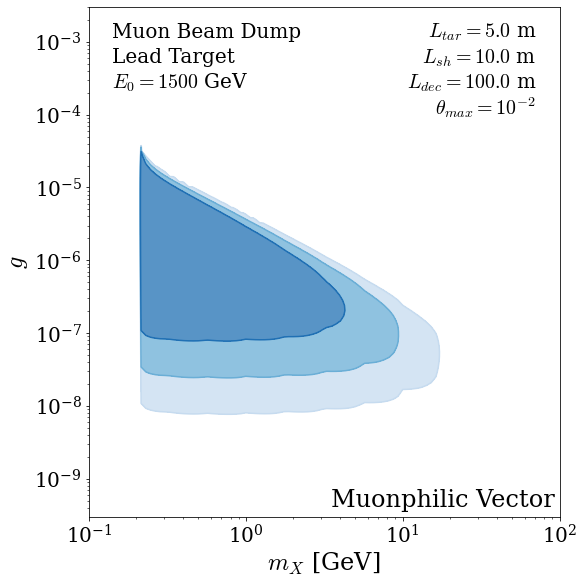

[(0.7792233756247597, 0.9132333717800846, 0.7518031526336024, 1.0), (0.45176470588235296, 0.7670895809304115, 0.4612072279892349, 1.0), (0.1340253748558247, 0.5423298731257208, 0.26828143021914647, 1.0)]


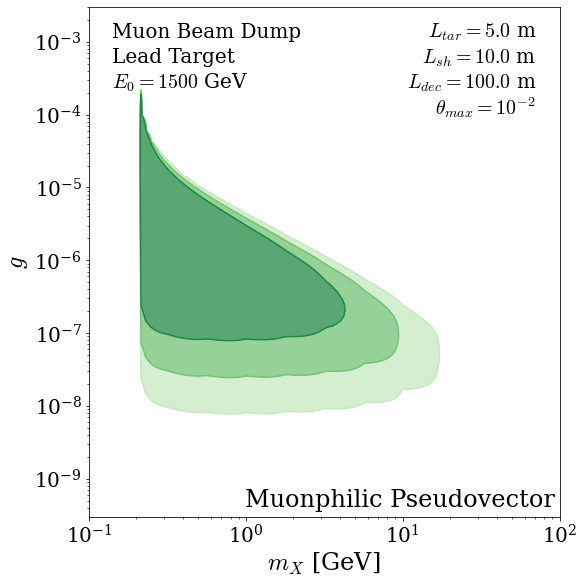

Checking for existing event yield data at experiments/Lead/experiment_muonphilic_e5000_t5_s10_d100/event_counts.npy ...
Found existing event yield data for the specified experiment, no need to recalculate!
Event yields for Lead with target, shield, detector lengths of 5m, 10m, 100m, at 5000 GeV are available!

[(0.9882352941176471, 0.732072279892349, 0.6299269511726259, 1.0), (0.9835755478662053, 0.4127950788158401, 0.28835063437139563, 1.0), (0.7925720876585928, 0.09328719723183392, 0.11298731257208766, 1.0)]


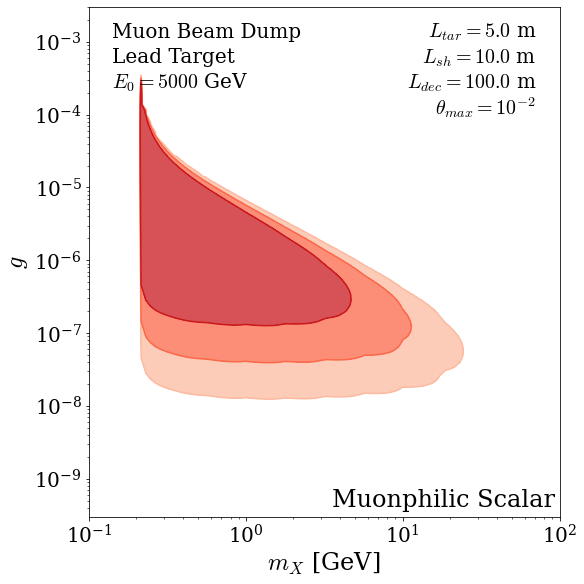

[(0.996078431372549, 0.8892425990003844, 0.5665974625144176, 1.0), (0.9949711649365629, 0.5974778931180315, 0.15949250288350636, 1.0), (0.7952941176470588, 0.2958246828143022, 0.008027681660899655, 1.0)]


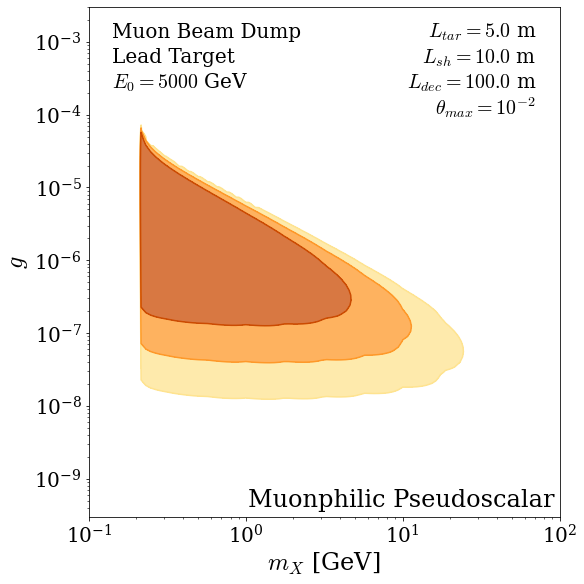

[(0.7752402921953095, 0.8583006535947711, 0.9368242983467897, 1.0), (0.41708573625528644, 0.6806305267204922, 0.8382314494425221, 1.0), (0.1271049596309112, 0.4401845444059977, 0.7074971164936563, 1.0)]


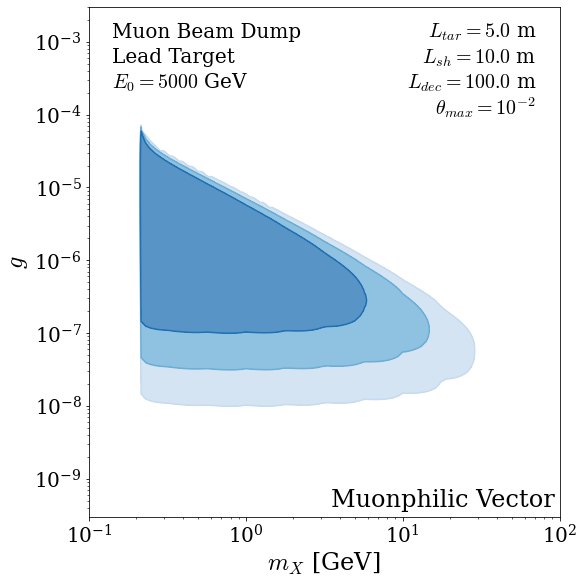

[(0.7792233756247597, 0.9132333717800846, 0.7518031526336024, 1.0), (0.45176470588235296, 0.7670895809304115, 0.4612072279892349, 1.0), (0.1340253748558247, 0.5423298731257208, 0.26828143021914647, 1.0)]


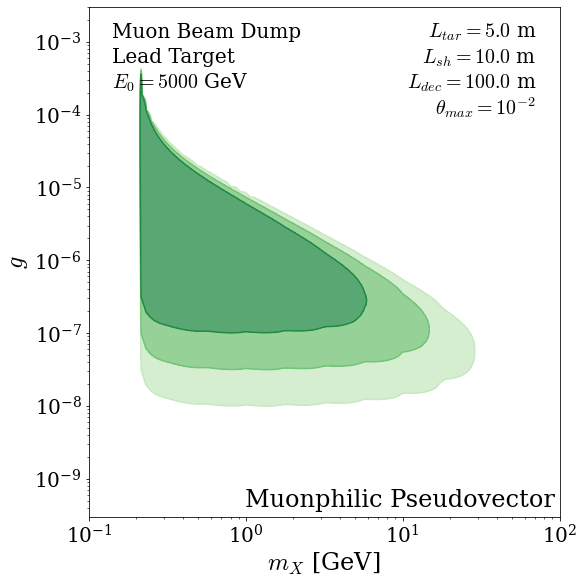

In [4]:
# ########## Muonphilic model parameters ##########
plot_mrange = (-1, 2)
plot_erange = (-9, -2)
epsilon_vs_g = False

cases = ["Scalar", "Pseudoscalar", "Vector", "Axial Vector"]

# Decay Parameters
model_names = {"Scalar" : "Muonphilic Scalar", "Pseudoscalar" : "Muonphilic Pseudoscalar", "Vector" : "Muonphilic Vector", "Axial Vector" : "Muonphilic Pseudovector"}
model_name_string = "muonphilic"
decay_dictionary = { # Format is [weight, mass, visibility]
                    "electrons" : [0, 0.000511, 1],
                    "muons" : [1, 0.105, 1],
                    "taus" : [0, 1.776, 1],
                    "neutrinos" : [0, 0, 0],
                    "hadrons" : [0, 0.105, 1], # Weight gets multiplied by Rpp
                    }

# #################################################
# ##### Don't touch below #########################

# Build configs
for target in targets:
    for E in E_0s:

        target_name = target
        target_Z = Zs[target]                # Target nucleus's electric charge
        target_A = As[target]             # Target atomic mass [g/mol] ~ [GeV]
        target_density = rhos[target]           # Target material density [g/cm3]
        target_length = l_T[target][E]          # Length of target [m]

        cross_section_dir = f"experiments/{target_name}/cross_sections/"
        experiment_dir = f"experiments/{target_name}/experiment_{model_name_string}_e{E}_t{target_length}_s{shield_length}_d{detector_length}/"

        config = build_full_config(E < 100, xbins, cases, m_Xs, cross_section_dir, experiment_dir, E, m_lepton, theta_max, target_name, target_Z, target_A, target_density, target_length, shield_length, detector_length,  model_name_string, decay_dictionary, N_mu, plot_mrange, plot_erange)        
        calculate_event_yields(config, force_rerun = force_rerun)

        exclusion_plot(config, "Scalar", model_names["Scalar"], [np.log10(5e-2), np.log10(5), np.log10(5e2)], "Reds",
                        labels = [r"$N_{\mu} = 10^{22}$", r"$N_{\mu} = 10^{20}$", r"$N_{\mu} = 10^{18}$"], epsilon_vs_g = epsilon_vs_g)
        exclusion_plot(config, "Pseudoscalar", model_names["Pseudoscalar"], [np.log10(5e-2), np.log10(5), np.log10(5e2)], "YlOrBr",
                        labels = [r"$N_{\mu} = 10^{22}$", r"$N_{\mu} = 10^{20}$", r"$N_{\mu} = 10^{18}$"], epsilon_vs_g = epsilon_vs_g)
        exclusion_plot(config, "Vector", model_names["Vector"], [np.log10(5e-2), np.log10(5), np.log10(5e2)], "Blues",
                        labels = [r"$N_{\mu} = 10^{22}$", r"$N_{\mu} = 10^{20}$", r"$N_{\mu} = 10^{18}$"], epsilon_vs_g = epsilon_vs_g)
        exclusion_plot(config, "Axial Vector", model_names["Axial Vector"], [np.log10(5e-2), np.log10(5), np.log10(5e2)], "Greens",
                        labels = [r"$N_{\mu} = 10^{22}$", r"$N_{\mu} = 10^{20}$", r"$N_{\mu} = 10^{18}$"], epsilon_vs_g = epsilon_vs_g)



# $L_\mu - L_\tau$

Checking for existing event yield data at experiments/Water/experiment_lmu_minus_ltau_e10_t4_s10_d100/event_counts.npy ...
Found existing event yield data for the specified experiment, no need to recalculate!
Event yields for Water with target, shield, detector lengths of 4m, 10m, 100m, at 10 GeV are available!

[(0.7752402921953095, 0.8583006535947711, 0.9368242983467897, 1.0), (0.41708573625528644, 0.6806305267204922, 0.8382314494425221, 1.0), (0.1271049596309112, 0.4401845444059977, 0.7074971164936563, 1.0)]


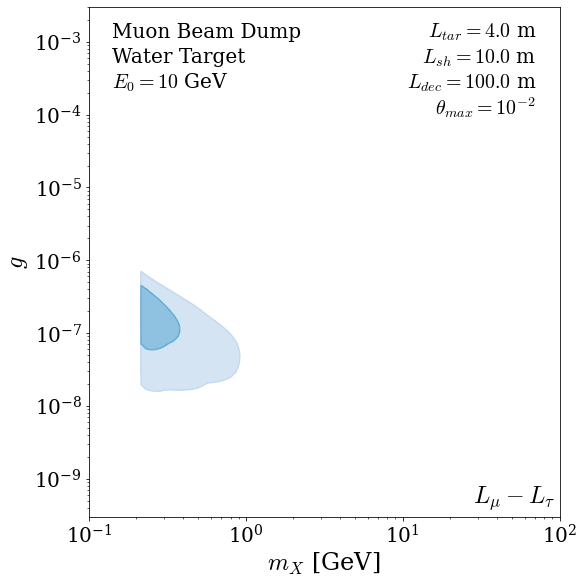

Checking for existing event yield data at experiments/Water/experiment_lmu_minus_ltau_e63_t10_s10_d100/event_counts.npy ...
Found existing event yield data for the specified experiment, no need to recalculate!
Event yields for Water with target, shield, detector lengths of 10m, 10m, 100m, at 63 GeV are available!

[(0.7752402921953095, 0.8583006535947711, 0.9368242983467897, 1.0), (0.41708573625528644, 0.6806305267204922, 0.8382314494425221, 1.0), (0.1271049596309112, 0.4401845444059977, 0.7074971164936563, 1.0)]


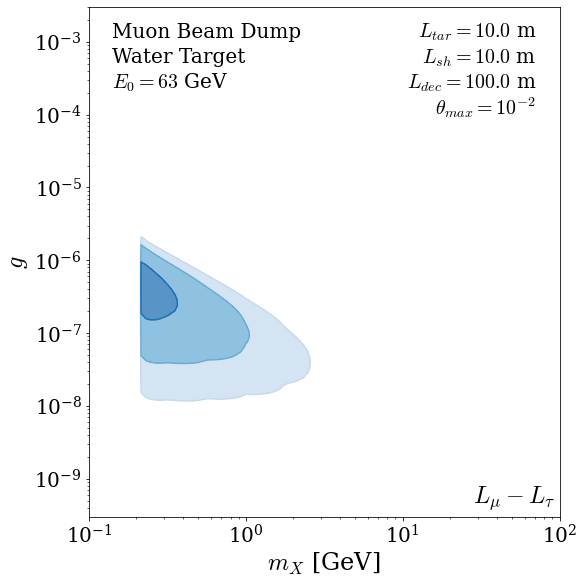

Checking for existing event yield data at experiments/Water/experiment_lmu_minus_ltau_e1500_t10_s10_d100/event_counts.npy ...
Found existing event yield data for the specified experiment, no need to recalculate!
Event yields for Water with target, shield, detector lengths of 10m, 10m, 100m, at 1500 GeV are available!

[(0.7752402921953095, 0.8583006535947711, 0.9368242983467897, 1.0), (0.41708573625528644, 0.6806305267204922, 0.8382314494425221, 1.0), (0.1271049596309112, 0.4401845444059977, 0.7074971164936563, 1.0)]


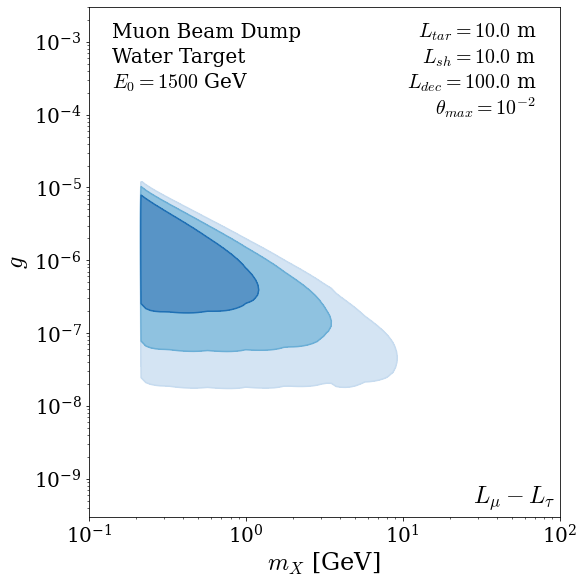

Checking for existing event yield data at experiments/Water/experiment_lmu_minus_ltau_e5000_t10_s10_d100/event_counts.npy ...
Found existing event yield data for the specified experiment, no need to recalculate!
Event yields for Water with target, shield, detector lengths of 10m, 10m, 100m, at 5000 GeV are available!

[(0.7752402921953095, 0.8583006535947711, 0.9368242983467897, 1.0), (0.41708573625528644, 0.6806305267204922, 0.8382314494425221, 1.0), (0.1271049596309112, 0.4401845444059977, 0.7074971164936563, 1.0)]


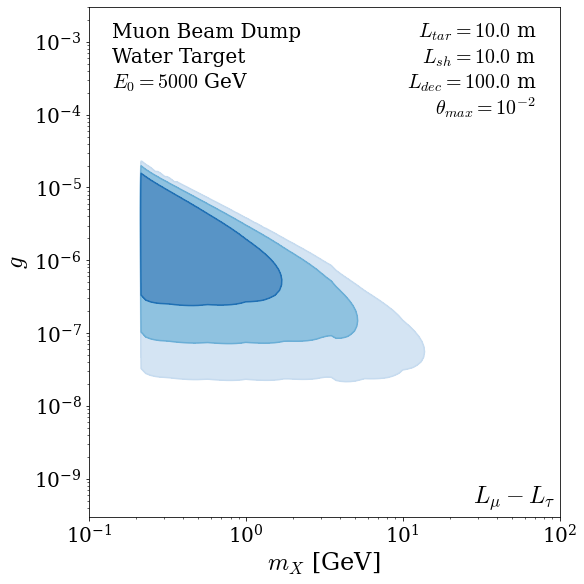

Checking for existing event yield data at experiments/Lead/experiment_lmu_minus_ltau_e10_t0.5_s10_d100/event_counts.npy ...
Found existing event yield data for the specified experiment, no need to recalculate!
Event yields for Lead with target, shield, detector lengths of 0m, 10m, 100m, at 10 GeV are available!

[(0.7752402921953095, 0.8583006535947711, 0.9368242983467897, 1.0), (0.41708573625528644, 0.6806305267204922, 0.8382314494425221, 1.0), (0.1271049596309112, 0.4401845444059977, 0.7074971164936563, 1.0)]


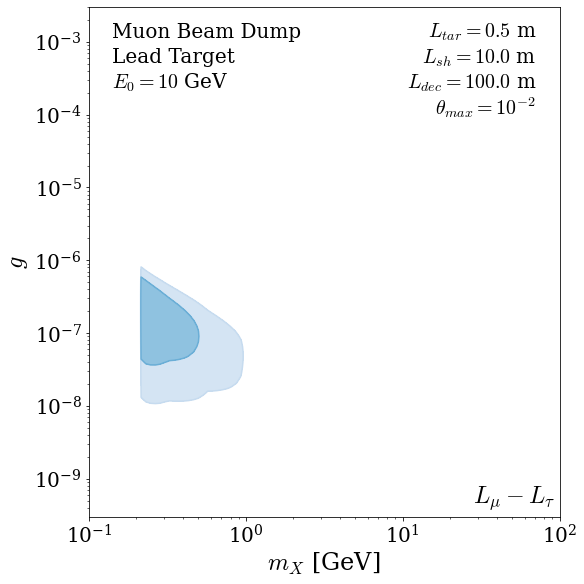

Checking for existing event yield data at experiments/Lead/experiment_lmu_minus_ltau_e63_t2_s10_d100/event_counts.npy ...
Found existing event yield data for the specified experiment, no need to recalculate!
Event yields for Lead with target, shield, detector lengths of 2m, 10m, 100m, at 63 GeV are available!

[(0.7752402921953095, 0.8583006535947711, 0.9368242983467897, 1.0), (0.41708573625528644, 0.6806305267204922, 0.8382314494425221, 1.0), (0.1271049596309112, 0.4401845444059977, 0.7074971164936563, 1.0)]


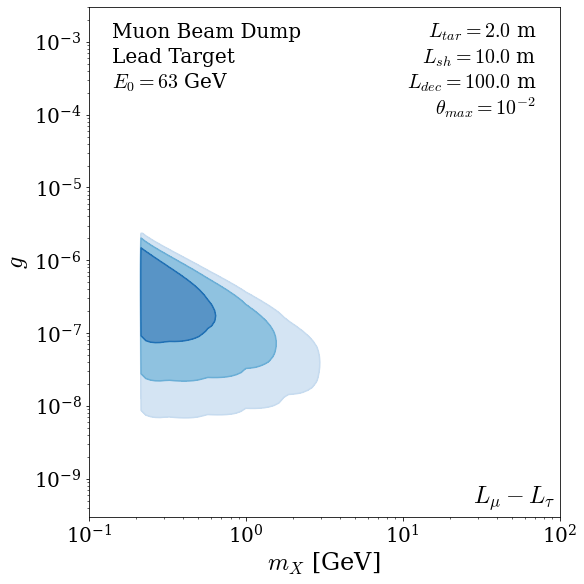

Checking for existing event yield data at experiments/Lead/experiment_lmu_minus_ltau_e1500_t5_s10_d100/event_counts.npy ...
Found existing event yield data for the specified experiment, no need to recalculate!
Event yields for Lead with target, shield, detector lengths of 5m, 10m, 100m, at 1500 GeV are available!

[(0.7752402921953095, 0.8583006535947711, 0.9368242983467897, 1.0), (0.41708573625528644, 0.6806305267204922, 0.8382314494425221, 1.0), (0.1271049596309112, 0.4401845444059977, 0.7074971164936563, 1.0)]


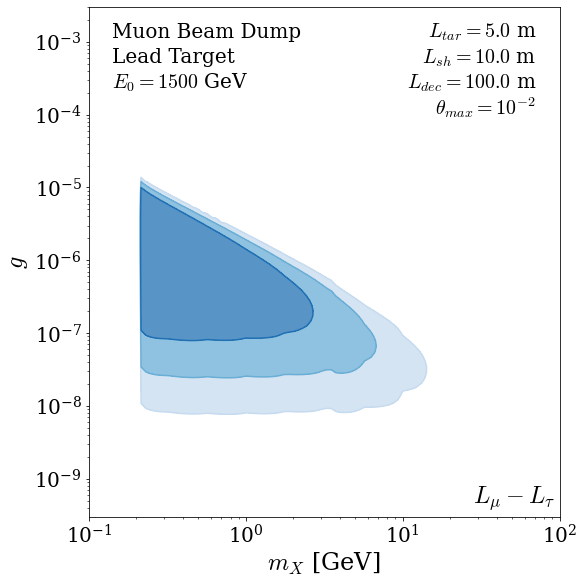

Checking for existing event yield data at experiments/Lead/experiment_lmu_minus_ltau_e5000_t5_s10_d100/event_counts.npy ...
Found existing event yield data for the specified experiment, no need to recalculate!
Event yields for Lead with target, shield, detector lengths of 5m, 10m, 100m, at 5000 GeV are available!

[(0.7752402921953095, 0.8583006535947711, 0.9368242983467897, 1.0), (0.41708573625528644, 0.6806305267204922, 0.8382314494425221, 1.0), (0.1271049596309112, 0.4401845444059977, 0.7074971164936563, 1.0)]


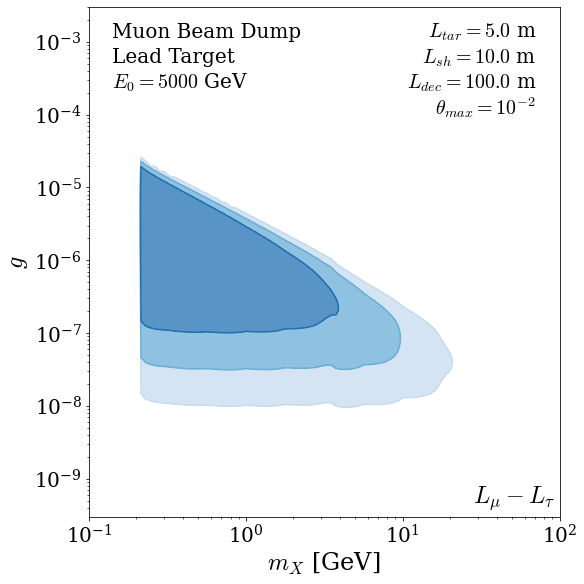

In [5]:
# ########## Lmu-Ltau model parameters ##########
plot_mrange = (-1, 2)
plot_erange = (-9, -2)
epsilon_vs_g = False

cases = ["Vector"]

# Decay Parameters
model_names = {"Vector" : r"$L_\mu - L_\tau$",}
model_name_string = "lmu_minus_ltau"
decay_dictionary = { # Format is [weight, mass, visibility]
                    "electrons" : [0, 0.000511, 1],
                    "muons" : [1, 0.105, 1],
                    "taus" : [1, 1.776, 1],
                    "neutrinos" : [2, 0, 0],
                    "hadrons" : [0, 0.105, 1], # Weight gets multiplied by Rpp
                    }

# #################################################
# ##### Don't touch below #########################

# Build configs
for target in targets:
    for E in E_0s:

        target_name = target
        target_Z = Zs[target]                # Target nucleus's electric charge
        target_A = As[target]             # Target atomic mass [g/mol] ~ [GeV]
        target_density = rhos[target]           # Target material density [g/cm3]
        target_length = l_T[target][E]          # Length of target [m]

        cross_section_dir = f"experiments/{target_name}/cross_sections/"
        experiment_dir = f"experiments/{target_name}/experiment_{model_name_string}_e{E}_t{target_length}_s{shield_length}_d{detector_length}/"

        config = build_full_config(E < 100, xbins, cases, m_Xs, cross_section_dir, experiment_dir, E, m_lepton, theta_max, target_name, target_Z, target_A, target_density, target_length, shield_length, detector_length,  model_name_string, decay_dictionary, N_mu, plot_mrange, plot_erange)        
        calculate_event_yields(config, force_rerun = force_rerun)

        
        exclusion_plot(config, "Vector", model_names["Vector"], [np.log10(5e-2), np.log10(5), np.log10(5e2)], "Blues",
                        labels = [r"$N_{\mu} = 10^{22}$", r"$N_{\mu} = 10^{20}$", r"$N_{\mu} = 10^{18}$"], epsilon_vs_g = epsilon_vs_g)
        

# Leptophilic


Checking for existing event yield data at experiments/Water/experiment_leptophilic_e10_t4_s10_d100/event_counts.npy ...
Found existing event yield data for the specified experiment, no need to recalculate!
Event yields for Water with target, shield, detector lengths of 4m, 10m, 100m, at 10 GeV are available!

[(0.7752402921953095, 0.8583006535947711, 0.9368242983467897, 1.0), (0.41708573625528644, 0.6806305267204922, 0.8382314494425221, 1.0), (0.1271049596309112, 0.4401845444059977, 0.7074971164936563, 1.0)]


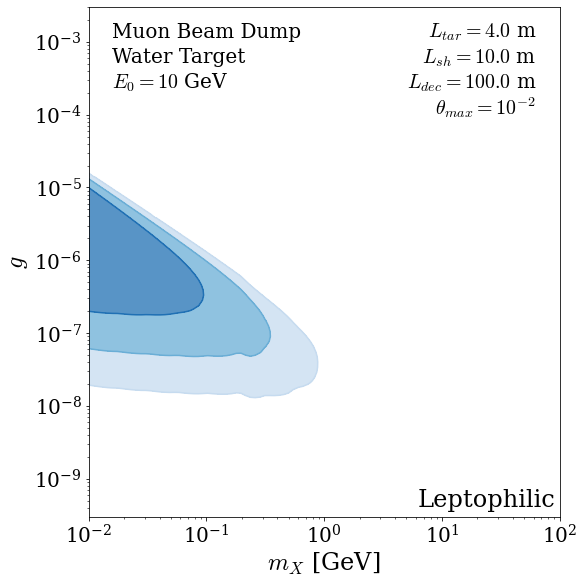

Checking for existing event yield data at experiments/Water/experiment_leptophilic_e63_t10_s10_d100/event_counts.npy ...
Found existing event yield data for the specified experiment, no need to recalculate!
Event yields for Water with target, shield, detector lengths of 10m, 10m, 100m, at 63 GeV are available!

[(0.7752402921953095, 0.8583006535947711, 0.9368242983467897, 1.0), (0.41708573625528644, 0.6806305267204922, 0.8382314494425221, 1.0), (0.1271049596309112, 0.4401845444059977, 0.7074971164936563, 1.0)]


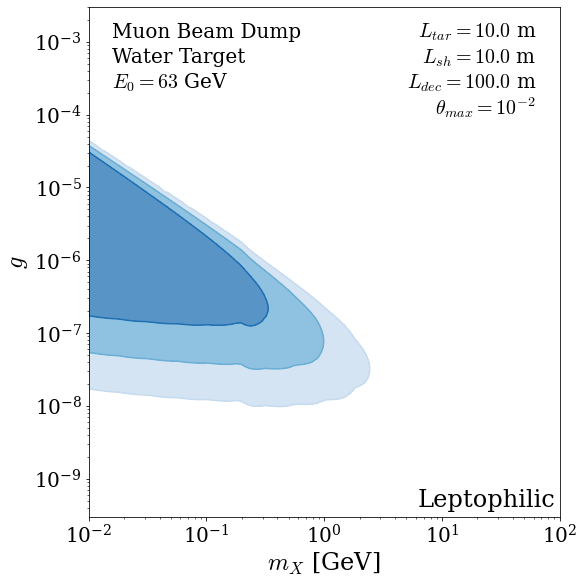

Checking for existing event yield data at experiments/Water/experiment_leptophilic_e1500_t10_s10_d100/event_counts.npy ...
Found existing event yield data for the specified experiment, no need to recalculate!
Event yields for Water with target, shield, detector lengths of 10m, 10m, 100m, at 1500 GeV are available!

[(0.7752402921953095, 0.8583006535947711, 0.9368242983467897, 1.0), (0.41708573625528644, 0.6806305267204922, 0.8382314494425221, 1.0), (0.1271049596309112, 0.4401845444059977, 0.7074971164936563, 1.0)]


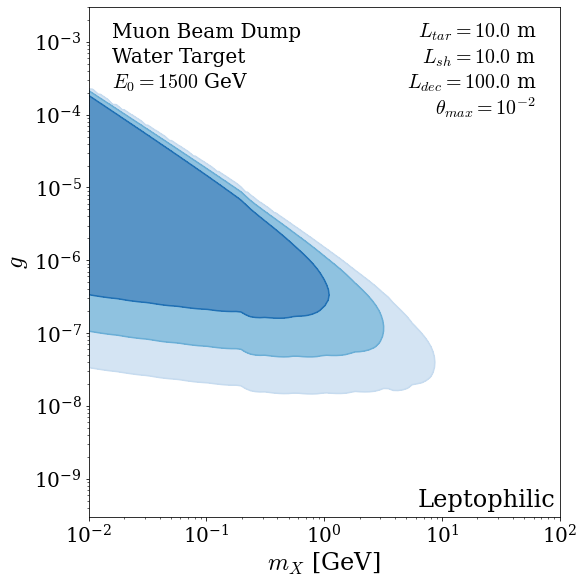

Checking for existing event yield data at experiments/Water/experiment_leptophilic_e5000_t10_s10_d100/event_counts.npy ...
Found existing event yield data for the specified experiment, no need to recalculate!
Event yields for Water with target, shield, detector lengths of 10m, 10m, 100m, at 5000 GeV are available!

[(0.7752402921953095, 0.8583006535947711, 0.9368242983467897, 1.0), (0.41708573625528644, 0.6806305267204922, 0.8382314494425221, 1.0), (0.1271049596309112, 0.4401845444059977, 0.7074971164936563, 1.0)]


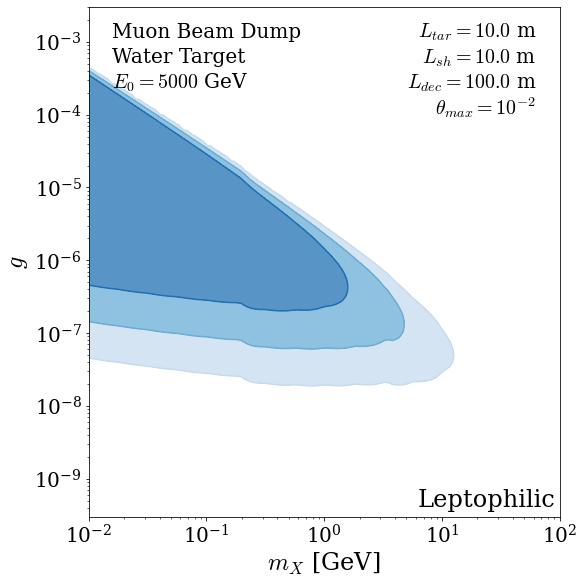

Checking for existing event yield data at experiments/Lead/experiment_leptophilic_e10_t0.5_s10_d100/event_counts.npy ...
Found existing event yield data for the specified experiment, no need to recalculate!
Event yields for Lead with target, shield, detector lengths of 0m, 10m, 100m, at 10 GeV are available!

[(0.7752402921953095, 0.8583006535947711, 0.9368242983467897, 1.0), (0.41708573625528644, 0.6806305267204922, 0.8382314494425221, 1.0), (0.1271049596309112, 0.4401845444059977, 0.7074971164936563, 1.0)]


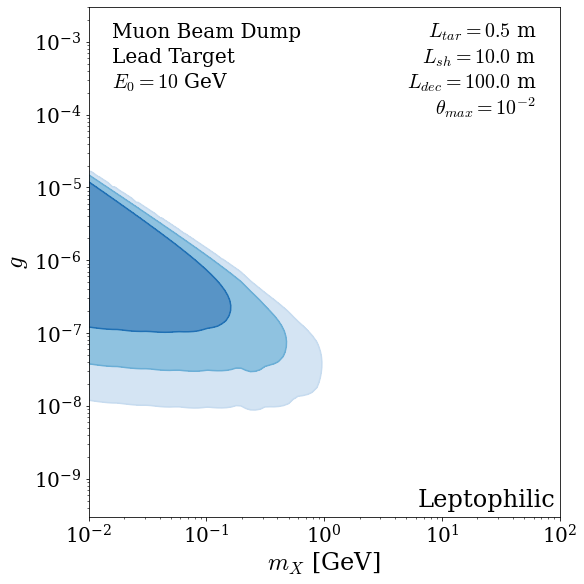

Checking for existing event yield data at experiments/Lead/experiment_leptophilic_e63_t2_s10_d100/event_counts.npy ...
Found existing event yield data for the specified experiment, no need to recalculate!
Event yields for Lead with target, shield, detector lengths of 2m, 10m, 100m, at 63 GeV are available!

[(0.7752402921953095, 0.8583006535947711, 0.9368242983467897, 1.0), (0.41708573625528644, 0.6806305267204922, 0.8382314494425221, 1.0), (0.1271049596309112, 0.4401845444059977, 0.7074971164936563, 1.0)]


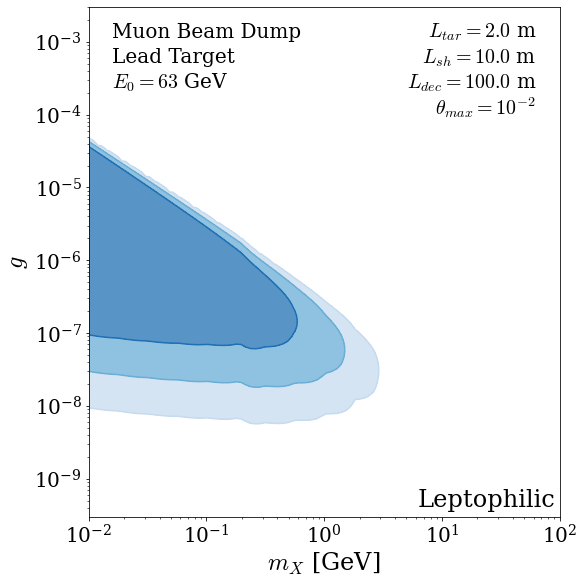

Checking for existing event yield data at experiments/Lead/experiment_leptophilic_e1500_t5_s10_d100/event_counts.npy ...
Found existing event yield data for the specified experiment, no need to recalculate!
Event yields for Lead with target, shield, detector lengths of 5m, 10m, 100m, at 1500 GeV are available!

[(0.7752402921953095, 0.8583006535947711, 0.9368242983467897, 1.0), (0.41708573625528644, 0.6806305267204922, 0.8382314494425221, 1.0), (0.1271049596309112, 0.4401845444059977, 0.7074971164936563, 1.0)]


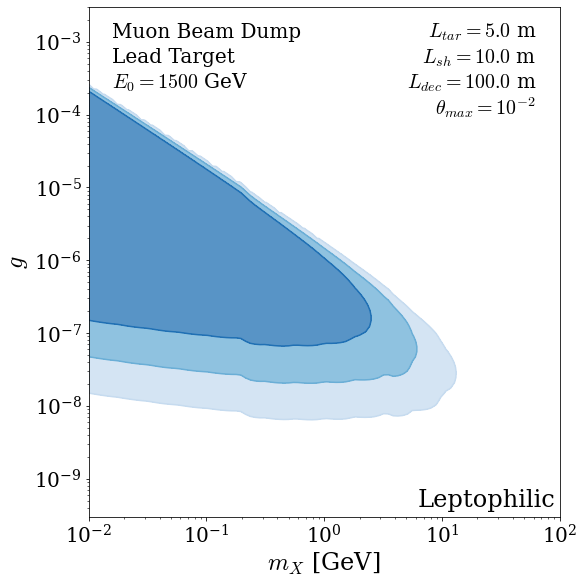

Checking for existing event yield data at experiments/Lead/experiment_leptophilic_e5000_t5_s10_d100/event_counts.npy ...
Found existing event yield data for the specified experiment, no need to recalculate!
Event yields for Lead with target, shield, detector lengths of 5m, 10m, 100m, at 5000 GeV are available!

[(0.7752402921953095, 0.8583006535947711, 0.9368242983467897, 1.0), (0.41708573625528644, 0.6806305267204922, 0.8382314494425221, 1.0), (0.1271049596309112, 0.4401845444059977, 0.7074971164936563, 1.0)]


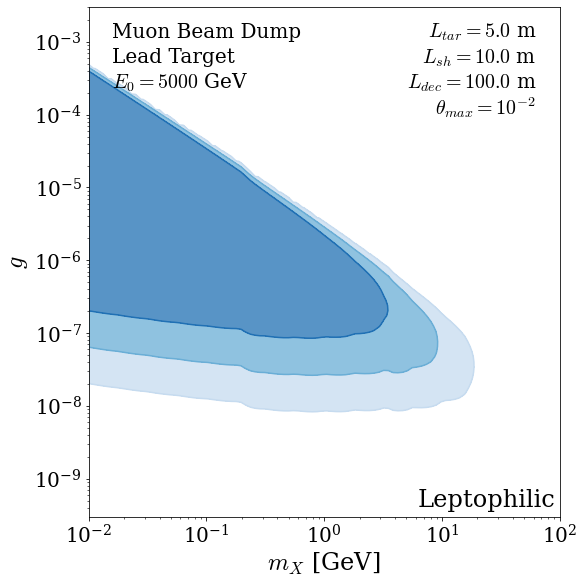

In [6]:
# ########## Leptophilic model parameters ##########
plot_mrange = (-2, 2)
plot_erange = (-9, -2)
epsilon_vs_g = False

cases = ["Vector"]

# Decay Parameters
model_names = {"Vector" : r"Leptophilic",}
model_name_string = "leptophilic"
decay_dictionary = { # Format is [weight, mass, visibility]
                    "electrons" : [1, 0.000511, 1],
                    "muons" : [1, 0.105, 1],
                    "taus" : [1, 1.776, 1],
                    "neutrinos" : [3, 0, 0],
                    "hadrons" : [0, 0.105, 1], # Weight gets multiplied by Rpp
                    }

# #################################################
# ##### Don't touch below #########################

# Build configs
for target in targets:
    for E in E_0s:

        target_name = target
        target_Z = Zs[target]                # Target nucleus's electric charge
        target_A = As[target]             # Target atomic mass [g/mol] ~ [GeV]
        target_density = rhos[target]           # Target material density [g/cm3]
        target_length = l_T[target][E]          # Length of target [m]

        cross_section_dir = f"experiments/{target_name}/cross_sections/"
        experiment_dir = f"experiments/{target_name}/experiment_{model_name_string}_e{E}_t{target_length}_s{shield_length}_d{detector_length}/"

        config = build_full_config(E < 100, xbins, cases, m_Xs, cross_section_dir, experiment_dir, E, m_lepton, theta_max, target_name, target_Z, target_A, target_density, target_length, shield_length, detector_length,  model_name_string, decay_dictionary, N_mu, plot_mrange, plot_erange)        
        calculate_event_yields(config, force_rerun = force_rerun)

        
        exclusion_plot(config, "Vector", model_names["Vector"], [np.log10(5e-2), np.log10(5), np.log10(5e2)], "Blues",
                        labels = [r"$N_{\mu} = 10^{22}$", r"$N_{\mu} = 10^{20}$", r"$N_{\mu} = 10^{18}$"], epsilon_vs_g = epsilon_vs_g)
        

# Dark Photon

Checking for existing event yield data at experiments/Water/experiment_darkX_e10_t4_s10_d100/event_counts.npy ...
Found existing event yield data for the specified experiment, no need to recalculate!
Event yields for Water with target, shield, detector lengths of 4m, 10m, 100m, at 10 GeV are available!

[(0.7752402921953095, 0.8583006535947711, 0.9368242983467897, 1.0), (0.41708573625528644, 0.6806305267204922, 0.8382314494425221, 1.0), (0.1271049596309112, 0.4401845444059977, 0.7074971164936563, 1.0)]


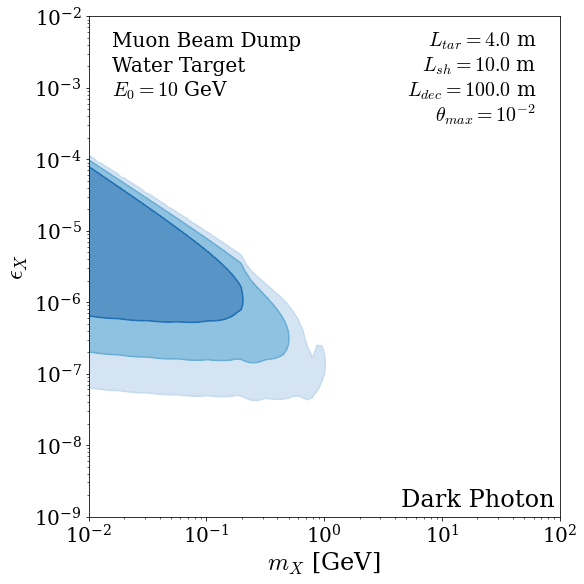

Checking for existing event yield data at experiments/Water/experiment_darkX_e63_t10_s10_d100/event_counts.npy ...
Found existing event yield data for the specified experiment, no need to recalculate!
Event yields for Water with target, shield, detector lengths of 10m, 10m, 100m, at 63 GeV are available!

[(0.7752402921953095, 0.8583006535947711, 0.9368242983467897, 1.0), (0.41708573625528644, 0.6806305267204922, 0.8382314494425221, 1.0), (0.1271049596309112, 0.4401845444059977, 0.7074971164936563, 1.0)]


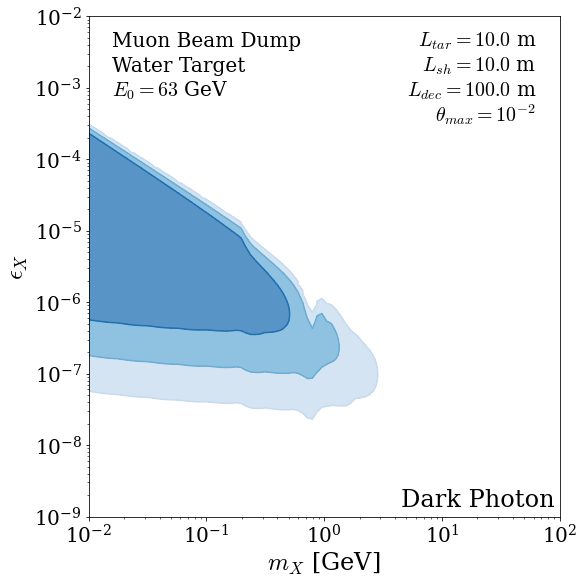

Checking for existing event yield data at experiments/Water/experiment_darkX_e1500_t10_s10_d100/event_counts.npy ...
Found existing event yield data for the specified experiment, no need to recalculate!
Event yields for Water with target, shield, detector lengths of 10m, 10m, 100m, at 1500 GeV are available!

[(0.7752402921953095, 0.8583006535947711, 0.9368242983467897, 1.0), (0.41708573625528644, 0.6806305267204922, 0.8382314494425221, 1.0), (0.1271049596309112, 0.4401845444059977, 0.7074971164936563, 1.0)]


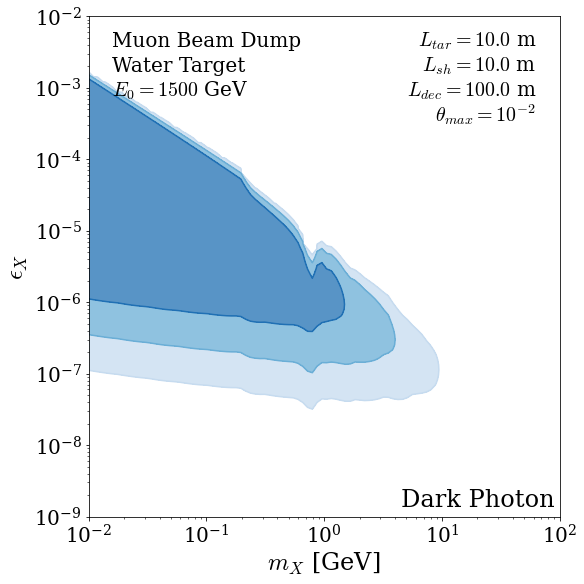

Checking for existing event yield data at experiments/Water/experiment_darkX_e5000_t10_s10_d100/event_counts.npy ...
Found existing event yield data for the specified experiment, no need to recalculate!
Event yields for Water with target, shield, detector lengths of 10m, 10m, 100m, at 5000 GeV are available!

[(0.7752402921953095, 0.8583006535947711, 0.9368242983467897, 1.0), (0.41708573625528644, 0.6806305267204922, 0.8382314494425221, 1.0), (0.1271049596309112, 0.4401845444059977, 0.7074971164936563, 1.0)]


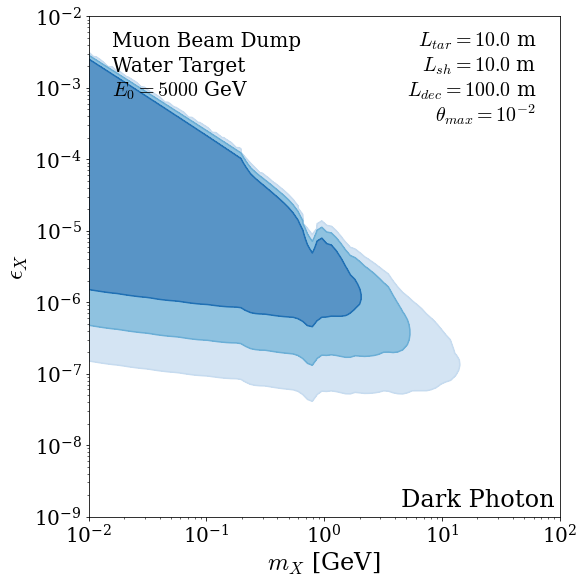

Checking for existing event yield data at experiments/Lead/experiment_darkX_e10_t0.5_s10_d100/event_counts.npy ...
Found existing event yield data for the specified experiment, no need to recalculate!
Event yields for Lead with target, shield, detector lengths of 0m, 10m, 100m, at 10 GeV are available!

[(0.7752402921953095, 0.8583006535947711, 0.9368242983467897, 1.0), (0.41708573625528644, 0.6806305267204922, 0.8382314494425221, 1.0), (0.1271049596309112, 0.4401845444059977, 0.7074971164936563, 1.0)]


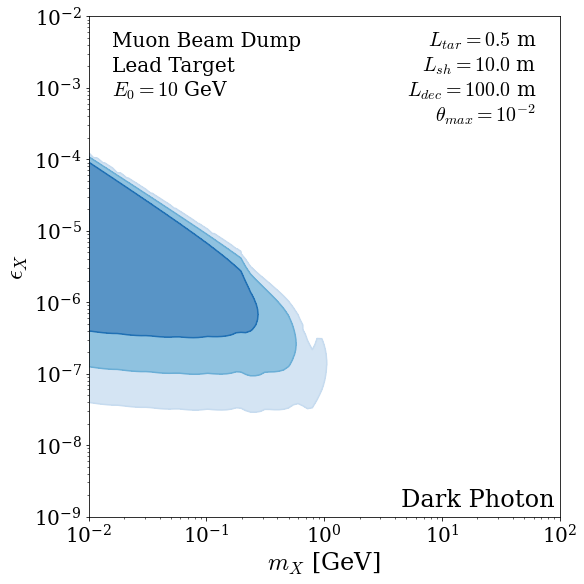

Checking for existing event yield data at experiments/Lead/experiment_darkX_e63_t2_s10_d100/event_counts.npy ...
Found existing event yield data for the specified experiment, no need to recalculate!
Event yields for Lead with target, shield, detector lengths of 2m, 10m, 100m, at 63 GeV are available!

[(0.7752402921953095, 0.8583006535947711, 0.9368242983467897, 1.0), (0.41708573625528644, 0.6806305267204922, 0.8382314494425221, 1.0), (0.1271049596309112, 0.4401845444059977, 0.7074971164936563, 1.0)]


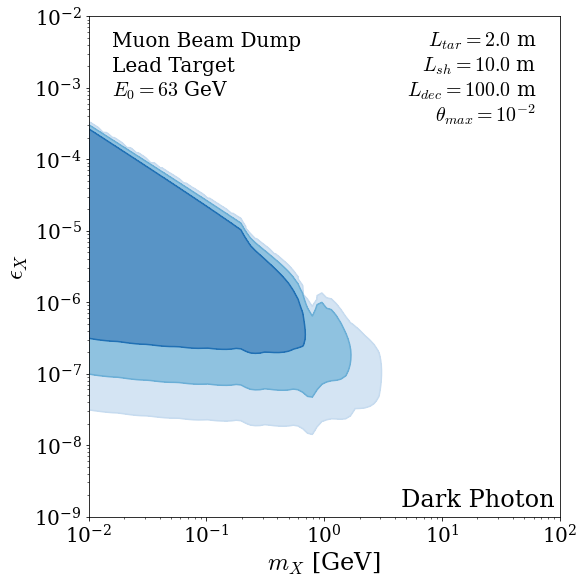

Checking for existing event yield data at experiments/Lead/experiment_darkX_e1500_t5_s10_d100/event_counts.npy ...
Found existing event yield data for the specified experiment, no need to recalculate!
Event yields for Lead with target, shield, detector lengths of 5m, 10m, 100m, at 1500 GeV are available!

[(0.7752402921953095, 0.8583006535947711, 0.9368242983467897, 1.0), (0.41708573625528644, 0.6806305267204922, 0.8382314494425221, 1.0), (0.1271049596309112, 0.4401845444059977, 0.7074971164936563, 1.0)]


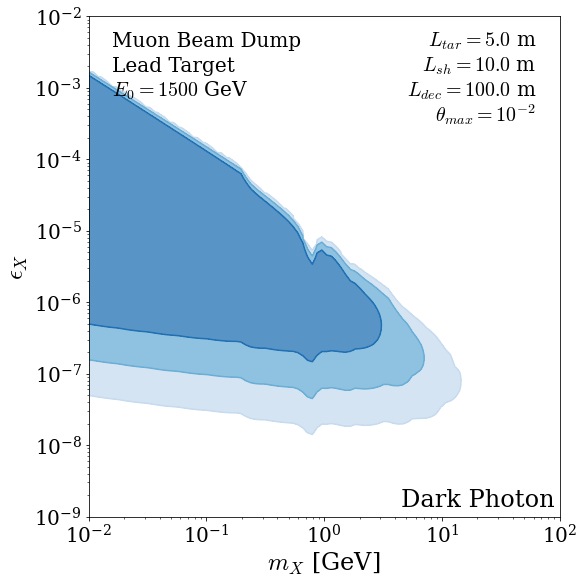

Checking for existing event yield data at experiments/Lead/experiment_darkX_e5000_t5_s10_d100/event_counts.npy ...
Found existing event yield data for the specified experiment, no need to recalculate!
Event yields for Lead with target, shield, detector lengths of 5m, 10m, 100m, at 5000 GeV are available!

[(0.7752402921953095, 0.8583006535947711, 0.9368242983467897, 1.0), (0.41708573625528644, 0.6806305267204922, 0.8382314494425221, 1.0), (0.1271049596309112, 0.4401845444059977, 0.7074971164936563, 1.0)]


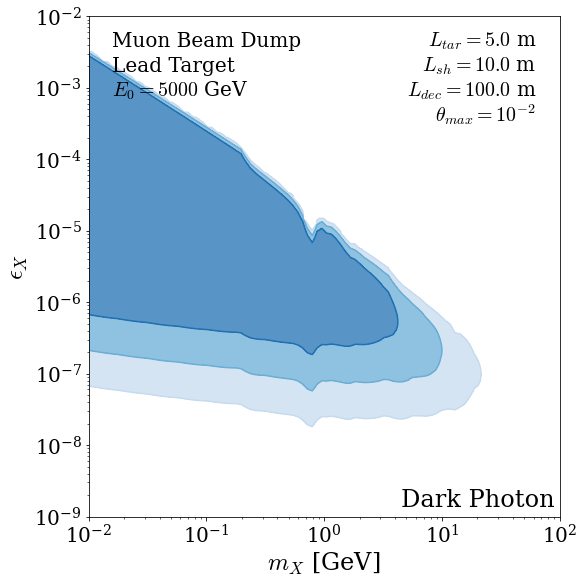

In [7]:
# ########## Leptophilic model parameters ##########
plot_mrange = (-2, 2)
plot_erange = (-9, -2)
epsilon_vs_g = True

cases = ["Vector"]

# Decay Parameters
model_names = {"Vector" : r"Dark Photon",}
model_name_string = "darkX"
decay_dictionary = { # Format is [weight, mass, visibility]
                    "electrons" : [1, 0.000511, 1],
                    "muons" : [1, 0.105, 1],
                    "taus" : [1, 1.776, 1],
                    "neutrinos" : [0, 0, 0],
                    "hadrons" : [1, 0.105, 1], # Weight gets multiplied by Rpp
                    }

# #################################################
# ##### Don't touch below #########################

# Build configs
for target in targets:
    for E in E_0s:

        target_name = target
        target_Z = Zs[target]                # Target nucleus's electric charge
        target_A = As[target]             # Target atomic mass [g/mol] ~ [GeV]
        target_density = rhos[target]           # Target material density [g/cm3]
        target_length = l_T[target][E]          # Length of target [m]

        cross_section_dir = f"experiments/{target_name}/cross_sections/"
        experiment_dir = f"experiments/{target_name}/experiment_{model_name_string}_e{E}_t{target_length}_s{shield_length}_d{detector_length}/"

        config = build_full_config(E < 100, xbins, cases, m_Xs, cross_section_dir, experiment_dir, E, m_lepton, theta_max, target_name, target_Z, target_A, target_density, target_length, shield_length, detector_length,  model_name_string, decay_dictionary, N_mu, plot_mrange, plot_erange)        
        calculate_event_yields(config, force_rerun = force_rerun)

        
        exclusion_plot(config, "Vector", model_names["Vector"], [np.log10(5e-2), np.log10(5), np.log10(5e2)], "Blues",
                        labels = [r"$N_{\mu} = 10^{22}$", r"$N_{\mu} = 10^{20}$", r"$N_{\mu} = 10^{18}$"], epsilon_vs_g = epsilon_vs_g)
        

# Leptonic Yukawa

Checking for existing event yield data at experiments/Water/experiment_leptonic_yukawa_e10_t4_s10_d100/event_counts.npy ...
Could not find existing event yield data for the specified experiment, calculating now ...


1000it [00:09, 101.31it/s]


Event yields for Water with target, shield, detector lengths of 4m, 10m, 100m, at 10 GeV are available!

[(0.9882352941176471, 0.732072279892349, 0.6299269511726259, 1.0), (0.9835755478662053, 0.4127950788158401, 0.28835063437139563, 1.0), (0.7925720876585928, 0.09328719723183392, 0.11298731257208766, 1.0)]


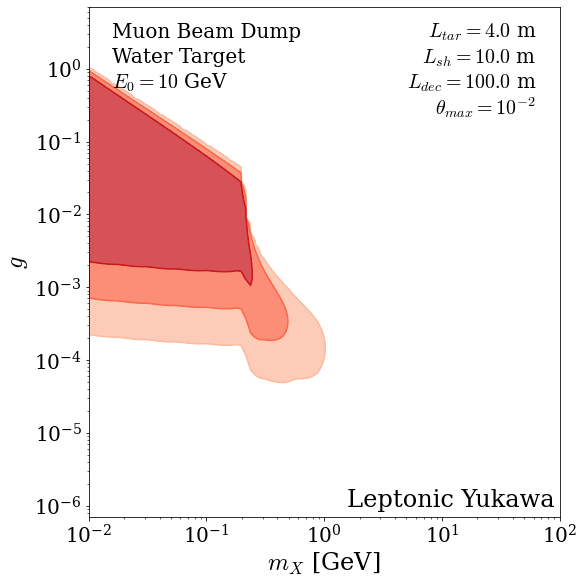

Checking for existing event yield data at experiments/Water/experiment_leptonic_yukawa_e63_t10_s10_d100/event_counts.npy ...
Could not find existing event yield data for the specified experiment, calculating now ...


1000it [00:09, 100.99it/s]


Event yields for Water with target, shield, detector lengths of 10m, 10m, 100m, at 63 GeV are available!

[(0.9882352941176471, 0.732072279892349, 0.6299269511726259, 1.0), (0.9835755478662053, 0.4127950788158401, 0.28835063437139563, 1.0), (0.7925720876585928, 0.09328719723183392, 0.11298731257208766, 1.0)]


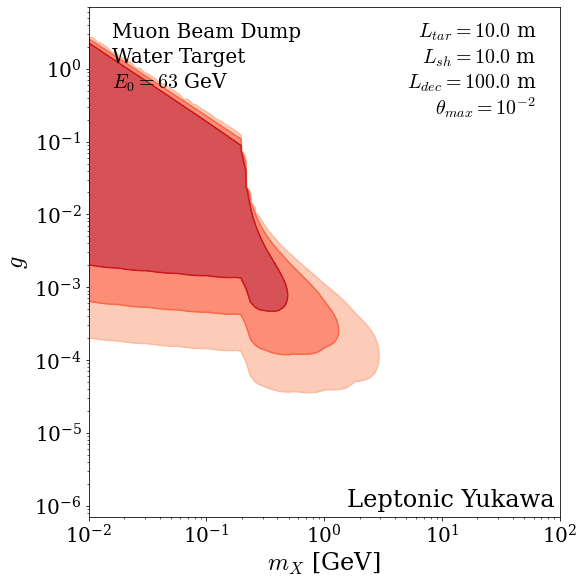

Checking for existing event yield data at experiments/Water/experiment_leptonic_yukawa_e1500_t10_s10_d100/event_counts.npy ...
Could not find existing event yield data for the specified experiment, calculating now ...


1000it [00:09, 101.57it/s]


Event yields for Water with target, shield, detector lengths of 10m, 10m, 100m, at 1500 GeV are available!

[(0.9882352941176471, 0.732072279892349, 0.6299269511726259, 1.0), (0.9835755478662053, 0.4127950788158401, 0.28835063437139563, 1.0), (0.7925720876585928, 0.09328719723183392, 0.11298731257208766, 1.0)]


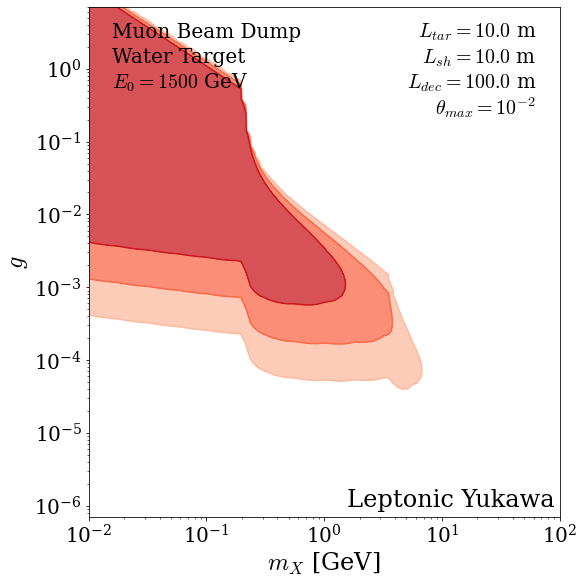

Checking for existing event yield data at experiments/Water/experiment_leptonic_yukawa_e5000_t10_s10_d100/event_counts.npy ...
Could not find existing event yield data for the specified experiment, calculating now ...


1000it [00:10, 99.64it/s]


Event yields for Water with target, shield, detector lengths of 10m, 10m, 100m, at 5000 GeV are available!

[(0.9882352941176471, 0.732072279892349, 0.6299269511726259, 1.0), (0.9835755478662053, 0.4127950788158401, 0.28835063437139563, 1.0), (0.7925720876585928, 0.09328719723183392, 0.11298731257208766, 1.0)]


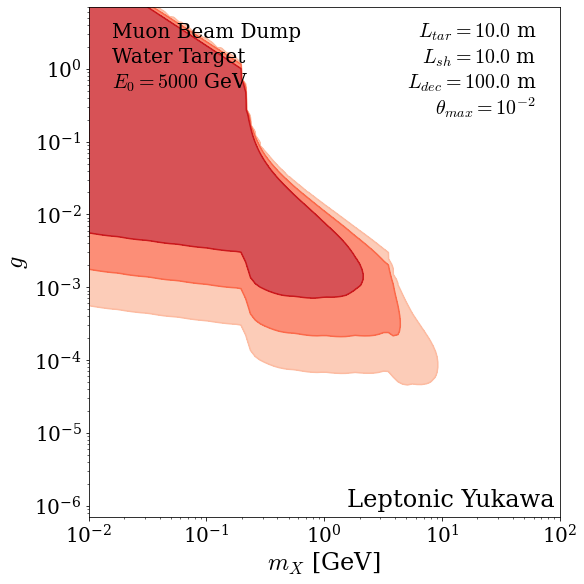

Checking for existing event yield data at experiments/Lead/experiment_leptonic_yukawa_e10_t0.5_s10_d100/event_counts.npy ...
Could not find existing event yield data for the specified experiment, calculating now ...


1000it [00:10, 97.68it/s]


Event yields for Lead with target, shield, detector lengths of 0m, 10m, 100m, at 10 GeV are available!

[(0.9882352941176471, 0.732072279892349, 0.6299269511726259, 1.0), (0.9835755478662053, 0.4127950788158401, 0.28835063437139563, 1.0), (0.7925720876585928, 0.09328719723183392, 0.11298731257208766, 1.0)]


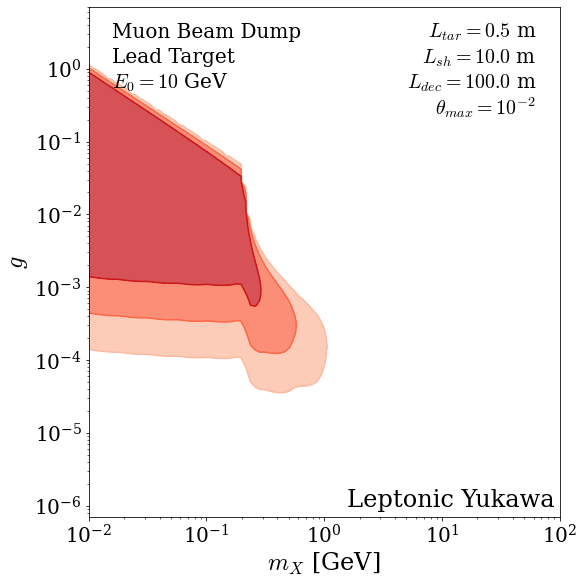

Checking for existing event yield data at experiments/Lead/experiment_leptonic_yukawa_e63_t2_s10_d100/event_counts.npy ...
Could not find existing event yield data for the specified experiment, calculating now ...


1000it [00:07, 128.30it/s]


Event yields for Lead with target, shield, detector lengths of 2m, 10m, 100m, at 63 GeV are available!

[(0.9882352941176471, 0.732072279892349, 0.6299269511726259, 1.0), (0.9835755478662053, 0.4127950788158401, 0.28835063437139563, 1.0), (0.7925720876585928, 0.09328719723183392, 0.11298731257208766, 1.0)]


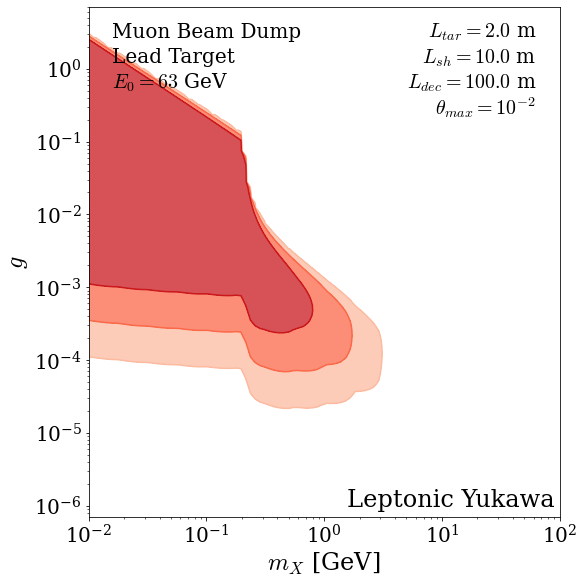

Checking for existing event yield data at experiments/Lead/experiment_leptonic_yukawa_e1500_t5_s10_d100/event_counts.npy ...
Could not find existing event yield data for the specified experiment, calculating now ...


1000it [00:07, 138.29it/s]


Event yields for Lead with target, shield, detector lengths of 5m, 10m, 100m, at 1500 GeV are available!

[(0.9882352941176471, 0.732072279892349, 0.6299269511726259, 1.0), (0.9835755478662053, 0.4127950788158401, 0.28835063437139563, 1.0), (0.7925720876585928, 0.09328719723183392, 0.11298731257208766, 1.0)]


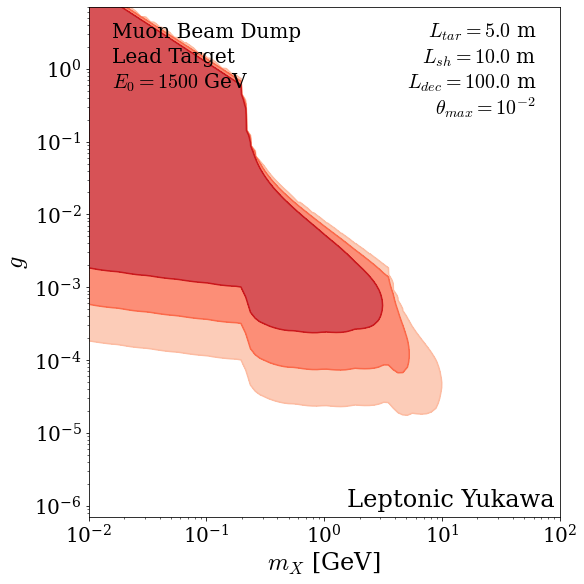

Checking for existing event yield data at experiments/Lead/experiment_leptonic_yukawa_e5000_t5_s10_d100/event_counts.npy ...
Could not find existing event yield data for the specified experiment, calculating now ...


1000it [00:07, 140.68it/s]


Event yields for Lead with target, shield, detector lengths of 5m, 10m, 100m, at 5000 GeV are available!

[(0.9882352941176471, 0.732072279892349, 0.6299269511726259, 1.0), (0.9835755478662053, 0.4127950788158401, 0.28835063437139563, 1.0), (0.7925720876585928, 0.09328719723183392, 0.11298731257208766, 1.0)]


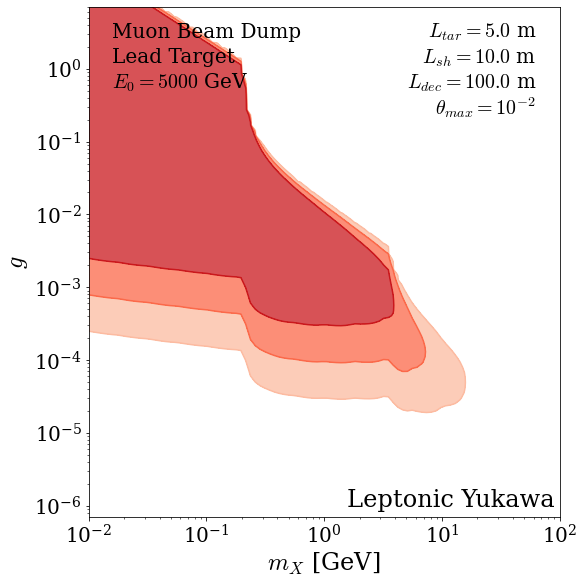

In [13]:
# ########## Leptophilic model parameters ##########
plot_mrange = (-2, 2)
plot_erange = (-9, -2)
epsilon_vs_g = False

cases = ["Scalar"]

# Decay Parameters
model_names = {"Scalar" : r"Leptonic Yukawa",}
model_name_string = "leptonic_yukawa"
vev = 246 # GeV
decay_dictionary = { # Format is [weight, mass, visibility]
                    "electrons" : [0.000511 / 0.105, 0.000511, 1],
                    "muons" : [1.0, 0.105, 1],
                    "taus" : [1.776 / 0.105, 1.776, 1],
                    "neutrinos" : [3 * 0.0 / 0.105, 0, 0],
                    "hadrons" : [0, 0.105, 1], # Weight gets multiplied by Rpp
                    }

# #################################################
# ##### Don't touch below #########################

# Build configs
for target in targets:
    for E in E_0s:

        target_name = target
        target_Z = Zs[target]                # Target nucleus's electric charge
        target_A = As[target]             # Target atomic mass [g/mol] ~ [GeV]
        target_density = rhos[target]           # Target material density [g/cm3]
        target_length = l_T[target][E]          # Length of target [m]

        cross_section_dir = f"experiments/{target_name}/cross_sections/"
        experiment_dir = f"experiments/{target_name}/experiment_{model_name_string}_e{E}_t{target_length}_s{shield_length}_d{detector_length}/"

        config = build_full_config(E < 100, xbins, cases, m_Xs, cross_section_dir, experiment_dir, E, m_lepton, theta_max, target_name, target_Z, target_A, target_density, target_length, shield_length, detector_length,  model_name_string, decay_dictionary, N_mu, plot_mrange, plot_erange)        
        calculate_event_yields(config, force_rerun = force_rerun)

        
        exclusion_plot(config, "Scalar", model_names["Scalar"], [np.log10(5e-2), np.log10(5), np.log10(5e2)], "Reds",
                        scale_factor= 1.0/(0.105 / vev),
                        labels = [r"$N_{\mu} = 10^{22}$", r"$N_{\mu} = 10^{20}$", r"$N_{\mu} = 10^{18}$"], epsilon_vs_g = epsilon_vs_g)
        